<a href="https://colab.research.google.com/github/Bhaveshreddy12/Analysis-on-bike-share-prediction-using-ML/blob/main/project_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project PPT
https://www.canva.com/design/DAGwlQQZQmE/5Ij-Jn2Y2m1mQfDaO9lU9g/edit?utm_content=DAGwlQQZQmE&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preprocessing**

In [ ]:
import pandas as pd
# input the path to the csv file on your drive.
data=pd.read_csv('/content/BIKE SHARE.csv')
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2011       1   0     1        0        6           0   
1          2  02-01-2011       1   0     1        0        0           0   
2          3  03-01-2011       1   0     1        0        1           1   
3          4  04-01-2011       1   0     1        0        2           1   
4          5  05-01-2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  27-12-2012       1   1    12        0        4           1   
727      728  28-12-2012       1   1    12        0        5           1   
728      729  29-12-2012       1   1    12        0        6           0   
729      730  30-12-2012       1   1    12        0        0           0   
730      731  31-12-2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [ ]:
data['casual'].unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data.rename(columns = {'yr':'year'}, inplace = True)
data.rename(columns = {'dteday':'dateday'}, inplace = True)
data.rename(columns = {'mnth':'month'}, inplace = True)
data.rename(columns = {'temp':'temperature'}, inplace = True)
data.rename(columns = {'cnt':'count'}, inplace = True)
data.rename(columns = {'hum':'humidity'}, inplace = True)
data.rename(columns = {'atemp':'atemperature'}, inplace = True)
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        6           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        1           1   
3          4  04-01-2011       1     0      1        0        2           1   
4          5  05-01-2011       1     0      1        0        3           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        4           1   
727      728  28-12-2012       1     1     12        0        5           1   
728      729  29-12-2012       1     1     12        0        6           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        1           1   

     weathersit  temperature  atemperature  humidity  windspeed  casual  \
0             2     0.344167      0.363625  0.805833   0.160446     331   
1             2     0.363478      0.353739  0.696087   0.248539     131   
2             1     0.196364      0.189405  0.437273   0.248309     120   
3             1     0.200000      0.212122  0.590435   0.160296     108   
4             1     0.226957      0.229270  0.436957   0.186900      82   
..          ...          ...           ...       ...        ...     ...   
726           2     0.254167      0.226642  0.652917   0.350133     247   
727           2     0.253333      0.255046  0.590000   0.155471     644   
728           2     0.253333      0.242400  0.752917   0.124383     159   
729           1     0.255833      0.231700  0.483333   0.350754     364   
730           2     0.215833      0.223487  0.577500   0.154846     439   

     registered  count  
0           654    985  
1           670    801  
2          1229   1349  
3          1454   1562  
4          1518   1600  
..          ...    ...  
726        1867   2114  
727        2451   3095  
728        1182   1341  
729        1432   1796  
730        2290   2729  

[731 rows x 16 columns]

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(731, 16)

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        6           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        1           1   
3          4  04-01-2011       1     0      1        0        2           1   
4          5  05-01-2011       1     0      1        0        3           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        4           1   
727      728  28-12-2012       1     1     12        0        5           1   
728      729  29-12-2012       1     1     12        0        6           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        1           1   

     weathersit  temperature  atemperature  humidity  windspeed  casual  \
0             2     0.344167      0.363625  0.805833   0.160446     331   
1             2     0.363478      0.353739  0.696087   0.248539     131   
2             1     0.196364      0.189405  0.437273   0.248309     120   
3             1     0.200000      0.212122  0.590435   0.160296     108   
4             1     0.226957      0.229270  0.436957   0.186900      82   
..          ...          ...           ...       ...        ...     ...   
726           2     0.254167      0.226642  0.652917   0.350133     247   
727           2     0.253333      0.255046  0.590000   0.155471     644   
728           2     0.253333      0.242400  0.752917   0.124383     159   
729           1     0.255833      0.231700  0.483333   0.350754     364   
730           2     0.215833      0.223487  0.577500   0.154846     439   

     registered  count  
0           654    985  
1           670    801  
2          1229   1349  
3          1454   1562  
4          1518   1600  
..          ...    ...  
726        1867   2114  
727        2451   3095  
728        1182   1341  
729        1432   1796  
730        2290   2729  

[731 rows x 16 columns]

In [ ]:
data.describe()

instant      season        year       month     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit  temperature  atemperature    humidity  \
count  731.000000  731.000000   731.000000    731.000000  731.000000   
mean     0.683995    1.395349     0.495385      0.474354    0.627894   
std      0.465233    0.544894     0.183051      0.162961    0.142429   
min      0.000000    1.000000     0.059130      0.079070    0.000000   
25%      0.000000    1.000000     0.337083      0.337842    0.520000   
50%      1.000000    1.000000     0.498333      0.486733    0.626667   
75%      1.000000    2.000000     0.655417      0.608602    0.730209   
max      1.000000    3.000000     0.861667      0.840896    0.972500   

        windspeed       casual   registered        count  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
std      0.077498   686.622488  1560.256377  1937.211452  
min      0.022392     2.000000    20.000000    22.000000  
25%      0.134950   315.500000  2497.000000  3152.000000  
50%      0.180975   713.000000  3662.000000  4548.000000  
75%      0.233214  1096.000000  4776.500000  5956.000000  
max      0.507463  3410.000000  6946.000000  8714.000000

In [ ]:
data.holiday.nunique()

2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dateday       731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weathersit    731 non-null    int64  
 9   temperature   731 non-null    float64
 10  atemperature  731 non-null    float64
 11  humidity      731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  count         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
data.isnull().sum()

instant         0
dateday         0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temperature     0
atemperature    0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        6           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        1           1   
3          4  04-01-2011       1     0      1        0        2           1   
4          5  05-01-2011       1     0      1        0        3           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        4           1   
727      728  28-12-2012       1     1     12        0        5           1   
728      729  29-12-2012       1     1     12        0        6           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        1           1   

     weathersit  temperature  atemperature  humidity  windspeed  casual  \
0             2     0.344167      0.363625  0.805833   0.160446     331   
1             2     0.363478      0.353739  0.696087   0.248539     131   
2             1     0.196364      0.189405  0.437273   0.248309     120   
3             1     0.200000      0.212122  0.590435   0.160296     108   
4             1     0.226957      0.229270  0.436957   0.186900      82   
..          ...          ...           ...       ...        ...     ...   
726           2     0.254167      0.226642  0.652917   0.350133     247   
727           2     0.253333      0.255046  0.590000   0.155471     644   
728           2     0.253333      0.242400  0.752917   0.124383     159   
729           1     0.255833      0.231700  0.483333   0.350754     364   
730           2     0.215833      0.223487  0.577500   0.154846     439   

     registered  count  
0           654    985  
1           670    801  
2          1229   1349  
3          1454   1562  
4          1518   1600  
..          ...    ...  
726        1867   2114  
727        2451   3095  
728        1182   1341  
729        1432   1796  
730        2290   2729  

[731 rows x 16 columns]

In [ ]:
#weekdays=0,weekend=1
data['weekday'] = data['weekday'].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1})

In [ ]:
data['weekday'].unique()

array([1, 0])

In [ ]:
data.weathersit.unique()

array([2, 1, 3])

In [ ]:
data['weathersit'] = data['weathersit'].map({1:'weathersit1', 2:'weathersit2', 3:'weathersit3'})

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        1           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        0           1   
3          4  04-01-2011       1     0      1        0        0           1   
4          5  05-01-2011       1     0      1        0        0           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        0           1   
727      728  28-12-2012       1     1     12        0        1           1   
728      729  29-12-2012       1     1     12        0        1           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        0           1   

      weathersit  temperature  atemperature  humidity  windspeed  casual  \
0    weathersit2     0.344167      0.363625  0.805833   0.160446     331   
1    weathersit2     0.363478      0.353739  0.696087   0.248539     131   
2    weathersit1     0.196364      0.189405  0.437273   0.248309     120   
3    weathersit1     0.200000      0.212122  0.590435   0.160296     108   
4    weathersit1     0.226957      0.229270  0.436957   0.186900      82   
..           ...          ...           ...       ...        ...     ...   
726  weathersit2     0.254167      0.226642  0.652917   0.350133     247   
727  weathersit2     0.253333      0.255046  0.590000   0.155471     644   
728  weathersit2     0.253333      0.242400  0.752917   0.124383     159   
729  weathersit1     0.255833      0.231700  0.483333   0.350754     364   
730  weathersit2     0.215833      0.223487  0.577500   0.154846     439   

     registered  count  
0           654    985  
1           670    801  
2          1229   1349  
3          1454   1562  
4          1518   1600  
..          ...    ...  
726        1867   2114  
727        2451   3095  
728        1182   1341  
729        1432   1796  
730        2290   2729  

[731 rows x 16 columns]

In [ ]:
data_dummies= pd.get_dummies(data['weathersit'],drop_first=True, prefix='weathersit')

In [ ]:
data_dummies = data_dummies.astype(int)

In [ ]:
data = pd.concat([data, data_dummies], axis=1)

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        1           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        0           1   
3          4  04-01-2011       1     0      1        0        0           1   
4          5  05-01-2011       1     0      1        0        0           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        0           1   
727      728  28-12-2012       1     1     12        0        1           1   
728      729  29-12-2012       1     1     12        0        1           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        0           1   

      weathersit  temperature  atemperature  humidity  windspeed  casual  \
0    weathersit2     0.344167      0.363625  0.805833   0.160446     331   
1    weathersit2     0.363478      0.353739  0.696087   0.248539     131   
2    weathersit1     0.196364      0.189405  0.437273   0.248309     120   
3    weathersit1     0.200000      0.212122  0.590435   0.160296     108   
4    weathersit1     0.226957      0.229270  0.436957   0.186900      82   
..           ...          ...           ...       ...        ...     ...   
726  weathersit2     0.254167      0.226642  0.652917   0.350133     247   
727  weathersit2     0.253333      0.255046  0.590000   0.155471     644   
728  weathersit2     0.253333      0.242400  0.752917   0.124383     159   
729  weathersit1     0.255833      0.231700  0.483333   0.350754     364   
730  weathersit2     0.215833      0.223487  0.577500   0.154846     439   

     registered  count  weathersit_weathersit2  weathersit_weathersit3  
0           654    985                       1                       0  
1           670    801                       1                       0  
2          1229   1349                       0                       0  
3          1454   1562                       0                       0  
4          1518   1600                       0                       0  
..          ...    ...                     ...                     ...  
726        1867   2114                       1                       0  
727        2451   3095                       1                       0  
728        1182   1341                       1                       0  
729        1432   1796                       0                       0  
730        2290   2729                       1                       0  

[731 rows x 18 columns]

In [ ]:
data=data.drop('weathersit',axis=1)

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        1           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        0           1   
3          4  04-01-2011       1     0      1        0        0           1   
4          5  05-01-2011       1     0      1        0        0           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        0           1   
727      728  28-12-2012       1     1     12        0        1           1   
728      729  29-12-2012       1     1     12        0        1           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        0           1   

     temperature  atemperature  humidity  windspeed  casual  registered  \
0       0.344167      0.363625  0.805833   0.160446     331         654   
1       0.363478      0.353739  0.696087   0.248539     131         670   
2       0.196364      0.189405  0.437273   0.248309     120        1229   
3       0.200000      0.212122  0.590435   0.160296     108        1454   
4       0.226957      0.229270  0.436957   0.186900      82        1518   
..           ...           ...       ...        ...     ...         ...   
726     0.254167      0.226642  0.652917   0.350133     247        1867   
727     0.253333      0.255046  0.590000   0.155471     644        2451   
728     0.253333      0.242400  0.752917   0.124383     159        1182   
729     0.255833      0.231700  0.483333   0.350754     364        1432   
730     0.215833      0.223487  0.577500   0.154846     439        2290   

     count  weathersit_weathersit2  weathersit_weathersit3  
0      985                       1                       0  
1      801                       1                       0  
2     1349                       0                       0  
3     1562                       0                       0  
4     1600                       0                       0  
..     ...                     ...                     ...  
726   2114                       1                       0  
727   3095                       1                       0  
728   1341                       1                       0  
729   1796                       0                       0  
730   2729                       1                       0  

[731 rows x 17 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

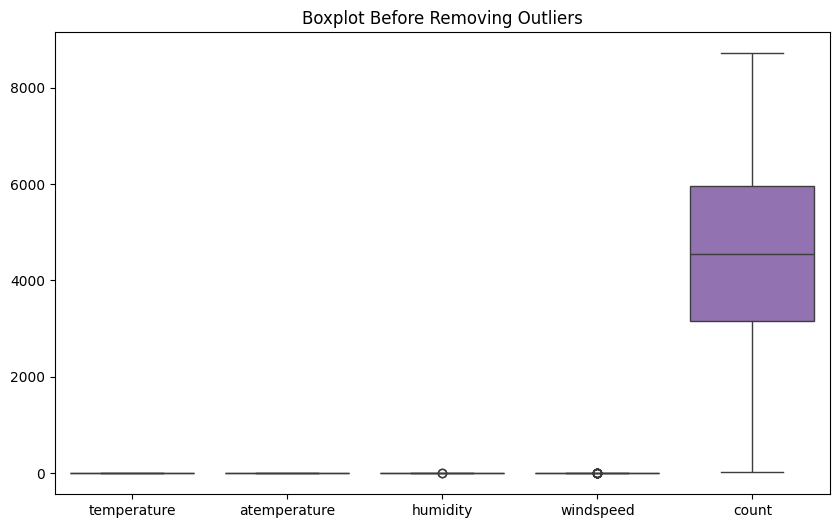

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['temperature', 'atemperature', 'humidity', 'windspeed', 'count']])
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['temperature', 'atemperature', 'humidity', 'windspeed', 'count']:
    data = remove_outliers_iqr(data, col)

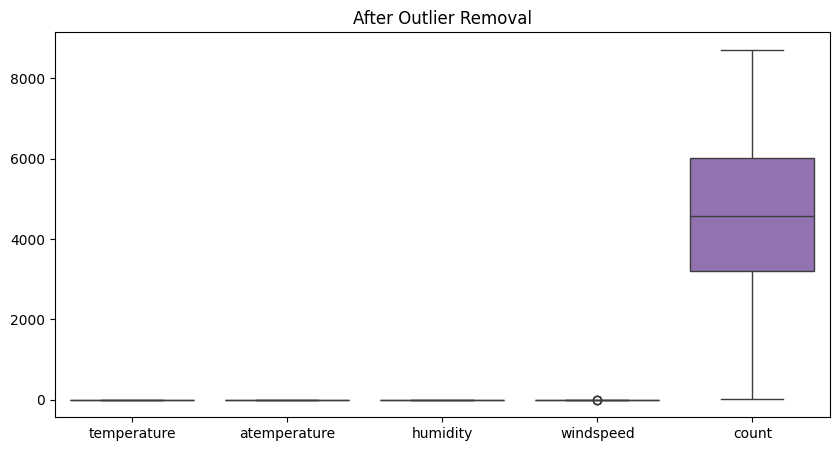

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['temperature', 'atemperature', 'humidity', 'windspeed', 'count']])
plt.title("After Outlier Removal")
plt.show()

In [ ]:
data.shape

(717, 17)

In [ ]:
data.describe()

instant     season        year       month     holiday     weekday  \
count  717.000000  717.00000  717.000000  717.000000  717.000000  717.000000   
mean   366.779637    2.51325    0.499303    6.562064    0.029289    0.285914   
std    210.971354    1.10555    0.500349    3.439113    0.168732    0.452164   
min      1.000000    1.00000    0.000000    1.000000    0.000000    0.000000   
25%    185.000000    2.00000    0.000000    4.000000    0.000000    0.000000   
50%    365.000000    3.00000    0.000000    7.000000    0.000000    0.000000   
75%    550.000000    3.00000    1.000000   10.000000    0.000000    1.000000   
max    731.000000    4.00000    1.000000   12.000000    1.000000    1.000000   

       workingday  temperature  atemperature    humidity   windspeed  \
count  717.000000   717.000000    717.000000  717.000000  717.000000   
mean     0.684798     0.497365      0.476252    0.631562    0.186287   
std      0.464921     0.183617      0.163155    0.139222    0.071786   
min      0.000000     0.059130      0.079070    0.254167    0.022392   
25%      0.000000     0.337500      0.337939    0.524583    0.134329   
50%      1.000000     0.505833      0.491783    0.630833    0.178496   
75%      1.000000     0.656667      0.611121    0.732917    0.230721   
max      1.000000     0.861667      0.840896    0.972500    0.378108   

            casual   registered        count  weathersit_weathersit2  \
count   717.000000   717.000000   717.000000              717.000000   
mean    856.944212  3675.899582  4532.843794                0.340307   
std     689.273998  1557.676255  1933.542429                0.474143   
min       2.000000    20.000000    22.000000                0.000000   
25%     318.000000  2545.000000  3214.000000                0.000000   
50%     727.000000  3681.000000  4570.000000                0.000000   
75%    1120.000000  4807.000000  6031.000000                1.000000   
max    3410.000000  6946.000000  8714.000000                1.000000   

       weathersit_weathersit3  
count              717.000000  
mean                 0.027894  
std                  0.164784  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000

In [ ]:
#import numpy as np
#data['count'] = np.log(data['count'])

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        1           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        0           1   
3          4  04-01-2011       1     0      1        0        0           1   
4          5  05-01-2011       1     0      1        0        0           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        0           1   
727      728  28-12-2012       1     1     12        0        1           1   
728      729  29-12-2012       1     1     12        0        1           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        0           1   

     temperature  atemperature  humidity  windspeed  casual  registered  \
0       0.344167      0.363625  0.805833   0.160446     331         654   
1       0.363478      0.353739  0.696087   0.248539     131         670   
2       0.196364      0.189405  0.437273   0.248309     120        1229   
3       0.200000      0.212122  0.590435   0.160296     108        1454   
4       0.226957      0.229270  0.436957   0.186900      82        1518   
..           ...           ...       ...        ...     ...         ...   
726     0.254167      0.226642  0.652917   0.350133     247        1867   
727     0.253333      0.255046  0.590000   0.155471     644        2451   
728     0.253333      0.242400  0.752917   0.124383     159        1182   
729     0.255833      0.231700  0.483333   0.350754     364        1432   
730     0.215833      0.223487  0.577500   0.154846     439        2290   

     count  weathersit_weathersit2  weathersit_weathersit3  
0      985                       1                       0  
1      801                       1                       0  
2     1349                       0                       0  
3     1562                       0                       0  
4     1600                       0                       0  
..     ...                     ...                     ...  
726   2114                       1                       0  
727   3095                       1                       0  
728   1341                       1                       0  
729   1796                       0                       0  
730   2729                       1                       0  

[717 rows x 17 columns]

# **EDA(Expolatary Data Analysis)**

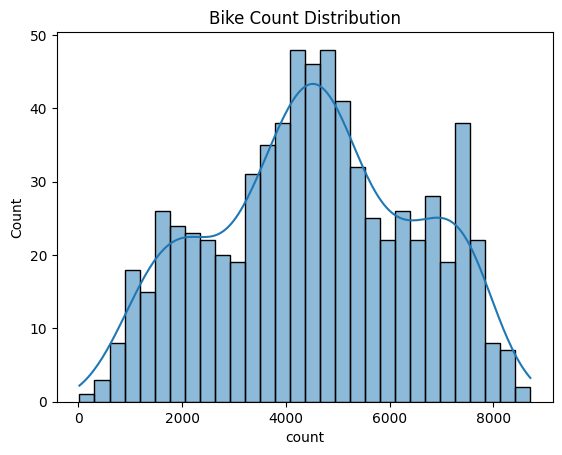

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
sns.histplot(data['count'], bins=30, kde=True)
plt.title("Bike Count Distribution")
plt.show()

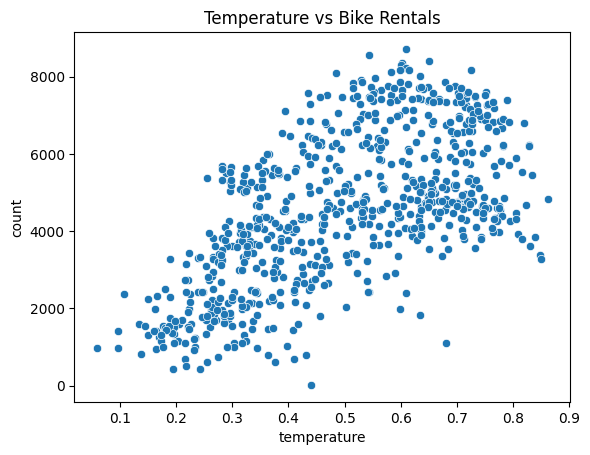

In [ ]:
sns.scatterplot(data=data, x='temperature', y='count')
plt.title("Temperature vs Bike Rentals")
plt.show()

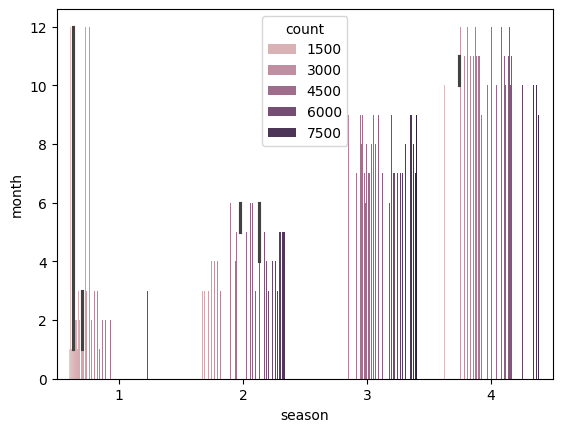

In [ ]:
sns.barplot(x='season', y='month', data=data,hue='count')
plt.show()

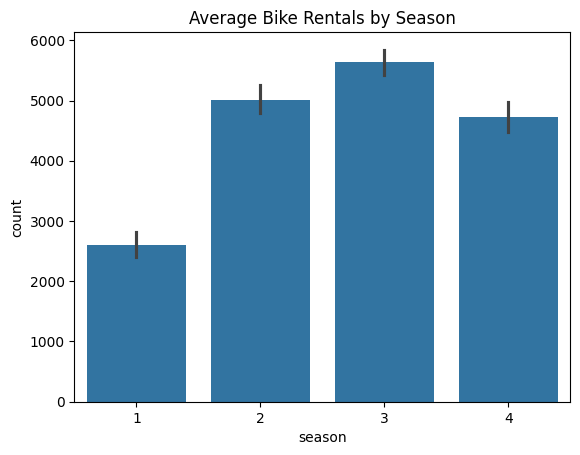

In [ ]:
sns.barplot(x='season', y='count', data=data)
plt.title('Average Bike Rentals by Season')
plt.show()

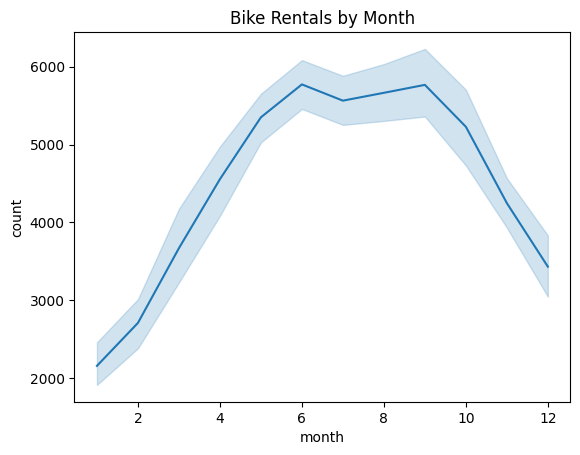

In [ ]:
sns.lineplot(x='month', y='count', data=data)
plt.title('Bike Rentals by Month')
plt.show()

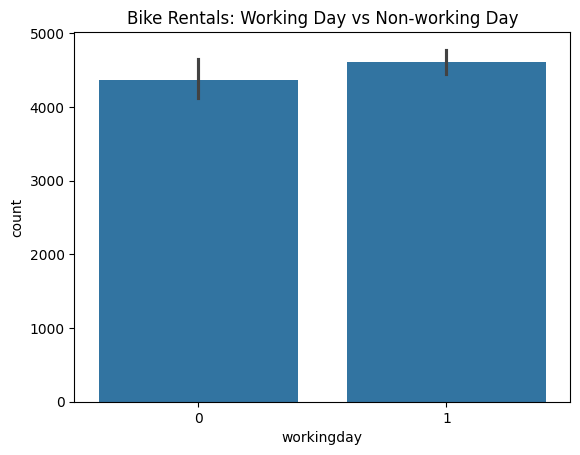

In [ ]:
sns.barplot(x='workingday', y='count', data=data)
plt.title('Bike Rentals: Working Day vs Non-working Day')
plt.show()

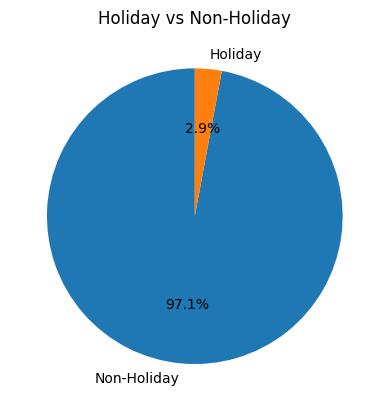

In [ ]:
# Holiday distribution
data['holiday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Non-Holiday', 'Holiday'])
plt.title('Holiday vs Non-Holiday')
plt.ylabel('')
plt.show()

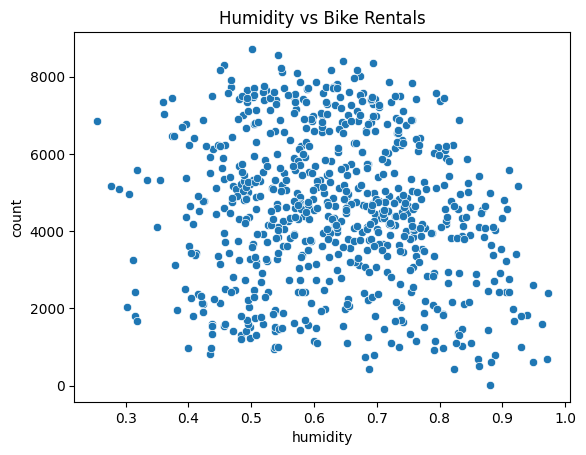

In [ ]:
sns.scatterplot(x='humidity', y='count', data=data)
plt.title('Humidity vs Bike Rentals')
plt.show()

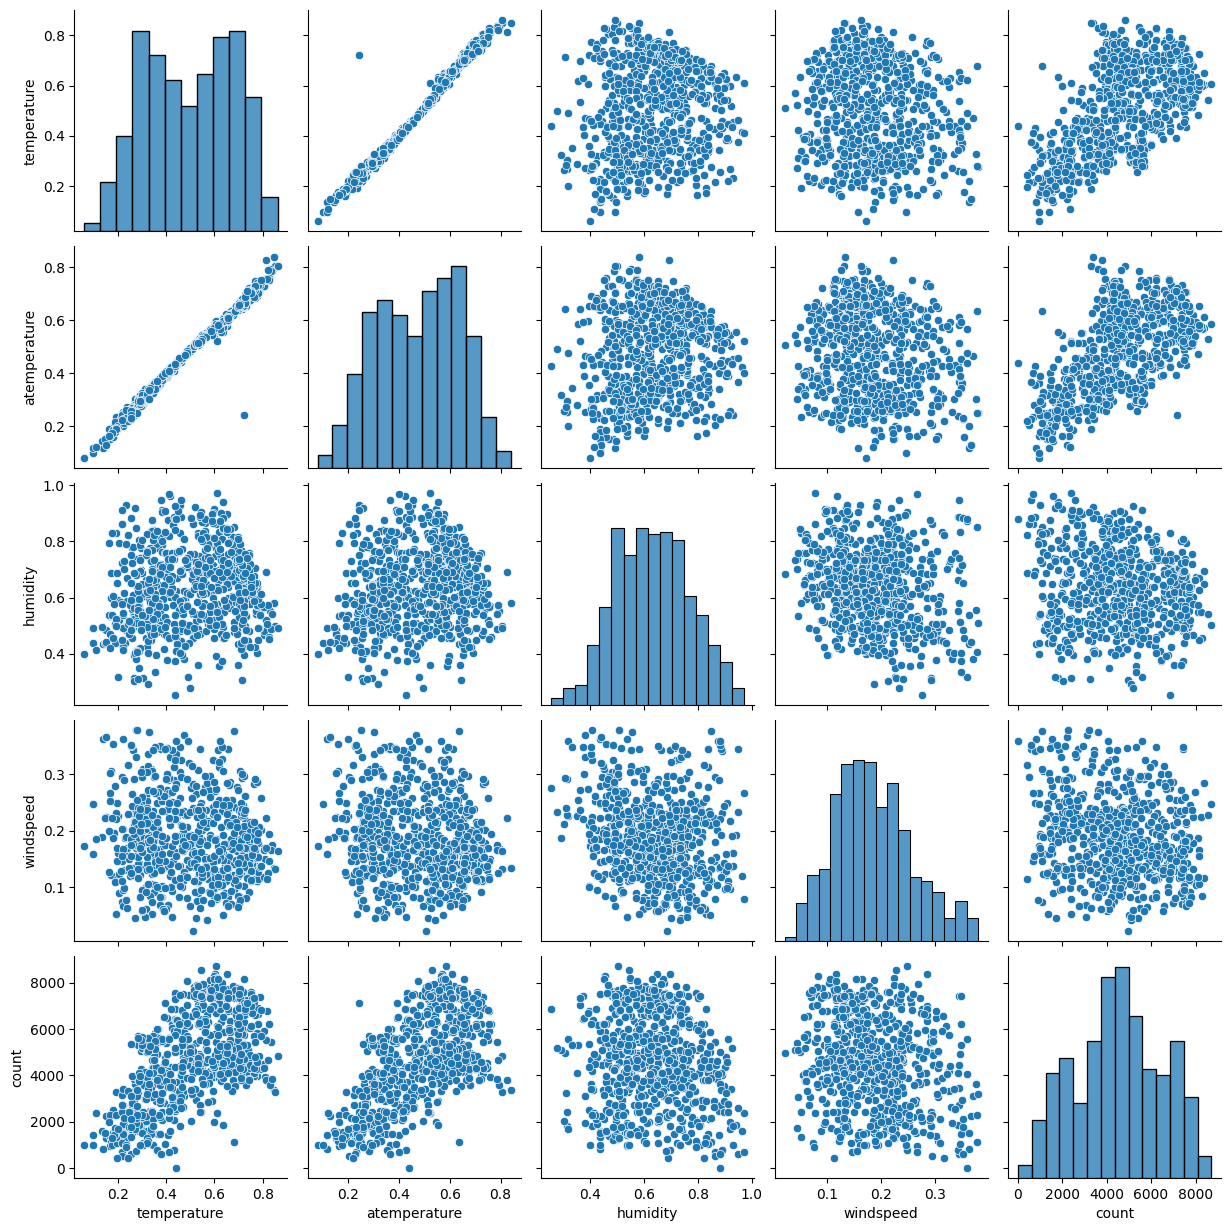

In [ ]:
sns.pairplot(data[['temperature', 'atemperature', 'humidity', 'windspeed', 'count']])
plt.show()

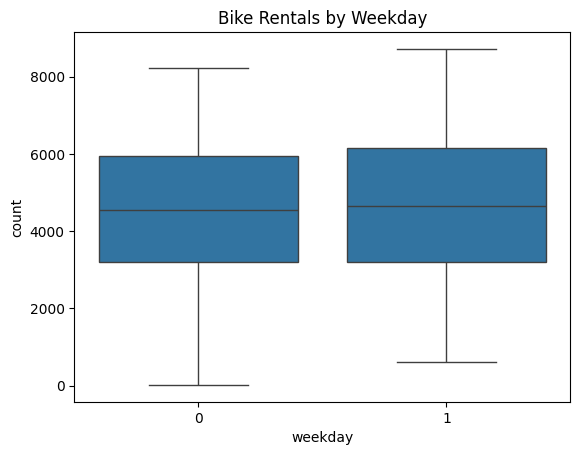

In [ ]:
sns.boxplot(x='weekday', y='count', data=data)
plt.title('Bike Rentals by Weekday')
plt.show()

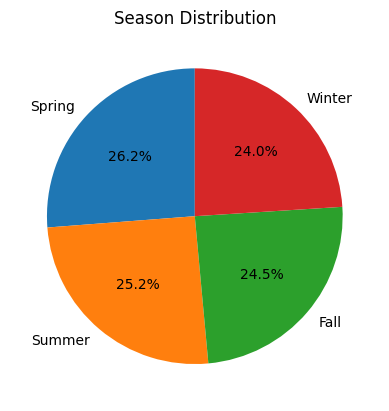

In [ ]:
# Season distribution
data['season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Season Distribution')
plt.ylabel('')
plt.show()

In [ ]:
data

instant     dateday  season  year  month  holiday  weekday  workingday  \
0          1  01-01-2011       1     0      1        0        1           0   
1          2  02-01-2011       1     0      1        0        0           0   
2          3  03-01-2011       1     0      1        0        0           1   
3          4  04-01-2011       1     0      1        0        0           1   
4          5  05-01-2011       1     0      1        0        0           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  27-12-2012       1     1     12        0        0           1   
727      728  28-12-2012       1     1     12        0        1           1   
728      729  29-12-2012       1     1     12        0        1           0   
729      730  30-12-2012       1     1     12        0        0           0   
730      731  31-12-2012       1     1     12        0        0           1   

     temperature  atemperature  humidity  windspeed  casual  registered  \
0       0.344167      0.363625  0.805833   0.160446     331         654   
1       0.363478      0.353739  0.696087   0.248539     131         670   
2       0.196364      0.189405  0.437273   0.248309     120        1229   
3       0.200000      0.212122  0.590435   0.160296     108        1454   
4       0.226957      0.229270  0.436957   0.186900      82        1518   
..           ...           ...       ...        ...     ...         ...   
726     0.254167      0.226642  0.652917   0.350133     247        1867   
727     0.253333      0.255046  0.590000   0.155471     644        2451   
728     0.253333      0.242400  0.752917   0.124383     159        1182   
729     0.255833      0.231700  0.483333   0.350754     364        1432   
730     0.215833      0.223487  0.577500   0.154846     439        2290   

     count  weathersit_weathersit2  weathersit_weathersit3  
0      985                       1                       0  
1      801                       1                       0  
2     1349                       0                       0  
3     1562                       0                       0  
4     1600                       0                       0  
..     ...                     ...                     ...  
726   2114                       1                       0  
727   3095                       1                       0  
728   1341                       1                       0  
729   1796                       0                       0  
730   2729                       1                       0  

[717 rows x 17 columns]

In [ ]:
data.drop('dateday', axis=1, inplace=True)

In [ ]:
#data.drop('instant', axis=1, inplace=True)
#data.drop('registered', axis=1, inplace=True)
#data.drop(['casual'], axis=1, inplace=True)

In [ ]:
data

instant  season  year  month  holiday  weekday  workingday  temperature  \
0          1       1     0      1        0        1           0     0.344167   
1          2       1     0      1        0        0           0     0.363478   
2          3       1     0      1        0        0           1     0.196364   
3          4       1     0      1        0        0           1     0.200000   
4          5       1     0      1        0        0           1     0.226957   
..       ...     ...   ...    ...      ...      ...         ...          ...   
726      727       1     1     12        0        0           1     0.254167   
727      728       1     1     12        0        1           1     0.253333   
728      729       1     1     12        0        1           0     0.253333   
729      730       1     1     12        0        0           0     0.255833   
730      731       1     1     12        0        0           1     0.215833   

     atemperature  humidity  windspeed  casual  registered  count  \
0        0.363625  0.805833   0.160446     331         654    985   
1        0.353739  0.696087   0.248539     131         670    801   
2        0.189405  0.437273   0.248309     120        1229   1349   
3        0.212122  0.590435   0.160296     108        1454   1562   
4        0.229270  0.436957   0.186900      82        1518   1600   
..            ...       ...        ...     ...         ...    ...   
726      0.226642  0.652917   0.350133     247        1867   2114   
727      0.255046  0.590000   0.155471     644        2451   3095   
728      0.242400  0.752917   0.124383     159        1182   1341   
729      0.231700  0.483333   0.350754     364        1432   1796   
730      0.223487  0.577500   0.154846     439        2290   2729   

     weathersit_weathersit2  weathersit_weathersit3  
0                         1                       0  
1                         1                       0  
2                         0                       0  
3                         0                       0  
4                         0                       0  
..                      ...                     ...  
726                       1                       0  
727                       1                       0  
728                       1                       0  
729                       0                       0  
730                       1                       0  

[717 rows x 16 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 717 non-null    int64  
 1   season                  717 non-null    int64  
 2   year                    717 non-null    int64  
 3   month                   717 non-null    int64  
 4   holiday                 717 non-null    int64  
 5   weekday                 717 non-null    int64  
 6   workingday              717 non-null    int64  
 7   temperature             717 non-null    float64
 8   atemperature            717 non-null    float64
 9   humidity                717 non-null    float64
 10  windspeed               717 non-null    float64
 11  casual                  717 non-null    int64  
 12  registered              717 non-null    int64  
 13  count                   717 non-null    int64  
 14  weathersit_weathersit2  717 non-null    int64  

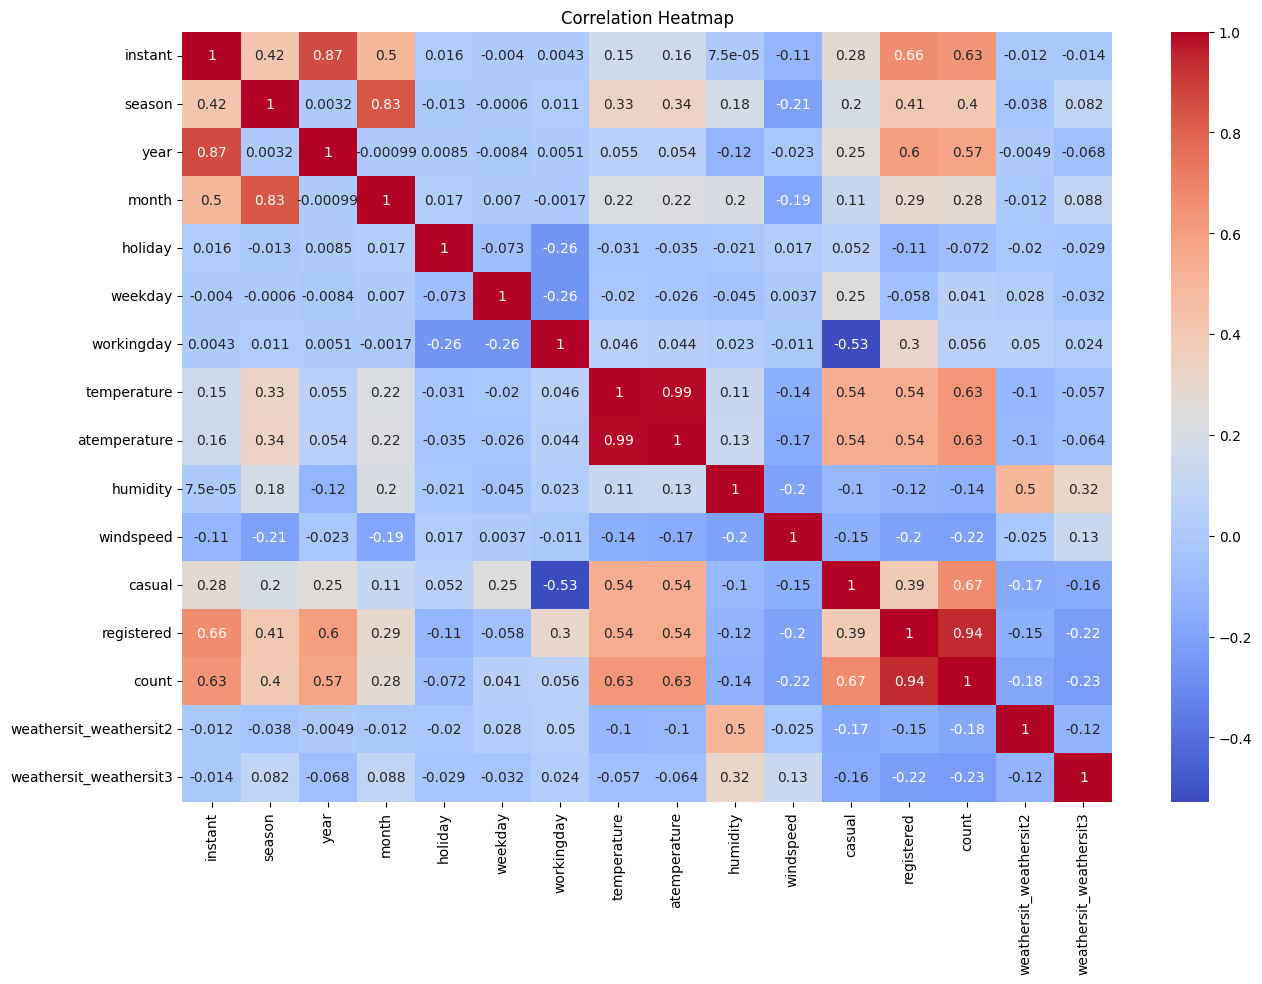

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data.drop(['weathersit_weathersit2','weathersit_weathersit3','holiday','humidity','windspeed','registered','temperature'], axis=1, inplace=True)

In [ ]:
import numpy as np
data['count'] = np.log(data['count'])

In [ ]:
data['casual'] = np.log(data['casual']+1)

In [ ]:
data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
data_dummies= pd.get_dummies(data['month'], prefix='month')

In [ ]:
data_dummies = data_dummies.astype(int)

In [ ]:
data = pd.concat([data, data_dummies], axis=1)

In [ ]:
#data['season'].unique()

In [ ]:
#data_dummies= pd.get_dummies(data['season'], prefix='season')

In [ ]:
#data_dummies = data_dummies.astype(int)

In [ ]:
#data = pd.concat([data, data_dummies], axis=1)

In [ ]:
data.drop(['season','month'], axis=1, inplace=True)

In [ ]:
data

instant  year  weekday  workingday  atemperature    casual     count  \
0          1     0        1           0      0.363625  5.805135  6.892642   
1          2     0        0           0      0.353739  4.882802  6.685861   
2          3     0        0           1      0.189405  4.795791  7.207119   
3          4     0        0           1      0.212122  4.691348  7.353722   
4          5     0        0           1      0.229270  4.418841  7.377759   
..       ...   ...      ...         ...           ...       ...       ...   
726      727     1        0           1      0.226642  5.513429  7.656337   
727      728     1        1           1      0.255046  6.469250  8.037543   
728      729     1        1           0      0.242400  5.075174  7.201171   
729      730     1        0           0      0.231700  5.899897  7.493317   
730      731     1        0           1      0.223487  6.086775  7.911691   

     month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0          1        0        0        0        0        0        0        0   
1          1        0        0        0        0        0        0        0   
2          1        0        0        0        0        0        0        0   
3          1        0        0        0        0        0        0        0   
4          1        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_9  month_10  month_11  month_12  
0          0         0         0         0  
1          0         0         0         0  
2          0         0         0         0  
3          0         0         0         0  
4          0         0         0         0  
..       ...       ...       ...       ...  
726        0         0         0         1  
727        0         0         0         1  
728        0         0         0         1  
729        0         0         0         1  
730        0         0         0         1  

[717 rows x 19 columns]

# **variance inflation factor(VIF)**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = data.drop(['count'], axis=1)

In [ ]:
x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
#vif_data = pd.DataFrame()
#vif_data["feature"] = x.columns
#vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
#vif_data

In [ ]:
#data.columns

In [ ]:
#x.drop(['weathersit_weathersit2'], axis=1,inplace=True)

In [ ]:
x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
#vif_data = pd.DataFrame()
#vif_data["feature"] = x.columns
#vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
#vif_data

In [ ]:
#x.drop(['humidity'], axis=1,inplace=True)

In [ ]:

x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
#vif_data = pd.DataFrame()
#vif_data["feature"] = x.columns
#vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
#vif_data

In [ ]:
x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

# **70:30**

In [ ]:
x = data.drop(['count'], axis=1)
y = data['count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 42)



**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:

x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:

#y_train_log = np.log1p(y_train)

In [ ]:
x_train

instant  year  weekday  workingday  atemperature    casual  month_1  \
43        44     0        0           0      0.324113  5.986452        0   
42        43     0        1           0      0.232954  5.666427        0   
76        77     0        1           1      0.527009  6.785588        0   
172      173     0        0           1      0.693829  6.495266        0   
363      364     0        1           1      0.318812  6.198479        0   
..       ...   ...      ...         ...           ...       ...      ...   
74        75     0        0           1      0.366930  5.774552        0   
111      112     0        1           1      0.321954  5.181784        0   
275      276     0        0           1      0.392046  5.802118        0   
446      447     1        0           1      0.531567  7.196687        0   
107      108     0        0           1      0.503146  6.507278        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
43         1        0        0        0        0        0        0        0   
42         1        0        0        0        0        0        0        0   
76         0        1        0        0        0        0        0        0   
172        0        0        0        0        1        0        0        0   
363        0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
74         0        1        0        0        0        0        0        0   
111        0        0        1        0        0        0        0        0   
275        0        0        0        0        0        0        0        0   
446        0        1        0        0        0        0        0        0   
107        0        0        1        0        0        0        0        0   

     month_10  month_11  month_12  
43          0         0         0  
42          0         0         0  
76          0         0         0  
172         0         0         0  
363         0         0         1  
..        ...       ...       ...  
74          0         0         0  
111         0         0         0  
275         1         0         0  
446         0         0         0  
107         0         0         0  

[501 rows x 18 columns]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear

Predicted    Actual
125   8.481423  8.435549
337   7.920253  8.156223
39    7.176027  7.380879
648   8.850516  8.947806
526   8.805329  8.794522
..         ...       ...
402   8.163216  8.383662
494   8.638208  8.458928
228   8.353240  8.454040
145   8.413527  8.450412
28    6.954469  7.001246

[216 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8260050785035001

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.1332107599969428

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.06669222148838794

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.019128393468303223

In [ ]:
model.coef_

array([-0.00268915,  1.27848182, -0.0407374 ,  0.51092007,  0.15087928,
        0.49808084, -0.41572947, -0.29195901, -0.43486462, -0.30746615,
       -0.16285488, -0.05107406, -0.00800332,  0.06111545,  0.25803252,
        0.35692598,  0.48981828,  0.50605929])

In [ ]:
model.intercept_

np.float64(5.056025641809484)

**SVM_Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
import random
random.seed(42)
np.random.seed(42)

In [ ]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

In [ ]:
#y_train_log = np.log1p(y_train)

In [ ]:
model.fit(x_train, y_train)

SVR(C=10, gamma=0.1)

In [ ]:
y_pred_= model.predict(x_test)
#y_pred = np.expm1(y_pred_log)

In [ ]:
y_pred

array([8.48142316, 7.92025252, 7.17602672, 8.85051634, 8.80532859,
       8.83086105, 7.61112011, 8.92176809, 7.61141281, 6.01949805,
       8.32862986, 7.70874871, 8.30244491, 7.80959741, 8.48998698,
       8.33067361, 8.59133311, 8.25908027, 8.61374192, 8.91483047,
       7.62705452, 8.21491745, 7.9042822 , 8.92573615, 8.47956927,
       8.36472717, 8.1442569 , 8.00404643, 7.51543301, 7.75464963,
       7.66934713, 7.89363669, 7.94160313, 8.38563218, 7.82228179,
       7.78874343, 8.03567209, 9.07092832, 8.26550069, 8.98859062,
       8.39530619, 8.88611005, 8.97602671, 8.26685021, 8.55527476,
       7.29601988, 7.69109466, 8.93083446, 8.2420146 , 8.72682595,
       8.34992845, 8.5334387 , 8.95191906, 7.9386636 , 8.15430407,
       8.89236551, 7.73064761, 8.47698541, 8.976531  , 8.69241382,
       7.03535595, 7.71000018, 7.90372308, 8.66624654, 8.45765871,
       8.77736366, 8.46661926, 7.9761673 , 8.78509124, 8.79223543,
       8.75133105, 8.46833802, 8.88521257, 8.56298771, 8.18985

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8260050785035001

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.1332107599969428

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.06669222148838794

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.25824837170520154)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.019128393468303223


1.9128393468303222

In [ ]:
#plt.scatter(x_test['holiday'], y_test, label='Test Data')
#plt.scatter(x_test['holiday'], y_pred, color='red', linewidth=1, label='SVM points')
#plt.xlabel('holiday')
#plt.ylabel('Count')
#plt.title('SVM Regression')
#plt.legend()
#plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
model=KNeighborsRegressor(n_neighbors=5,p=2,weights='distance',n_jobs=-1)

In [ ]:
model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
y_pred

array([8.39205344, 7.39261898, 7.33106115, 8.86465609, 8.86445042,
       8.82309663, 7.51638995, 8.77770992, 7.57691317, 7.508555  ,
       8.58511386, 7.93248404, 8.48270507, 7.63211332, 8.382754  ,
       8.58765232, 8.44503283, 8.38209371, 8.51234721, 8.82677847,
       7.27288817, 8.39279793, 8.56474605, 8.90105146, 8.41069683,
       8.40899569, 8.50881099, 7.62825069, 7.52547892, 8.14288464,
       8.10657351, 8.41303422, 8.16348136, 8.62056198, 7.77084323,
       8.09134725, 7.62067795, 8.87849   , 8.37568846, 8.90741256,
       8.42787462, 8.89267565, 8.90441896, 8.50675039, 8.47130449,
       7.43686626, 7.98546878, 8.8659904 , 8.35198011, 8.71846505,
       8.1977688 , 8.49209307, 8.9074392 , 8.06476501, 8.53806449,
       8.92992917, 7.57816223, 8.44060895, 8.83945964, 8.67038826,
       6.94726263, 7.80806945, 7.94382234, 8.60596712, 8.39561177,
       8.79917718, 8.4100853 , 7.94148924, 8.87849021, 8.6222952 ,
       8.73443546, 8.56785968, 8.90422065, 8.08544038, 8.05905

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted    Actual
125   8.392053  8.435549
337   7.392619  8.156223
39    7.331061  7.380879
648   8.864656  8.947806
526   8.864450  8.794522
..         ...       ...
402   8.335793  8.383662
494   8.573551  8.458928
228   8.343041  8.454040
145   8.416794  8.450412
28    7.025004  7.001246

[216 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6541426381706433

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.16053186672669367

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13256706333797783

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3640976013900364)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.024051150000807472


2.4051150000807473

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling is MUST for KNN)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # Manhattan vs Euclidean
}

# Grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Best model
best_knn = grid.best_estimator_
r2_test = best_knn.score(x_test, y_test)
print("Test R²:", r2_test)


Best Params: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV R²: 0.7113507536217973
Test R²: 0.6295616417742018


**Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.50045387, 7.1831117 , 7.33823815, 8.93471861, 8.64593815,
       8.66957087, 7.53101633, 8.9223916 , 7.61480536, 6.08904488,
       8.31213511, 7.61775958, 8.19505769, 7.69256965, 8.37239861,
       8.41383068, 8.4854961 , 8.47532899, 6.9206715 , 8.83985623,
       7.50218649, 8.25322765, 8.56788631, 8.95738174, 8.37609035,
       8.28349413, 8.11701409, 8.04462628, 7.56371967, 8.07527155,
       8.18227974, 7.61775958, 7.98446273, 8.38183155, 7.81237821,
       8.07527155, 8.04462628, 8.94441979, 8.42354164, 8.89370998,
       8.28349413, 8.83360848, 8.98281222, 8.36030544, 8.61522693,
       7.12929755, 7.93808873, 8.86149186, 8.31825433, 8.73793386,
       8.43272403, 8.4854961 , 8.93326848, 7.50494207, 8.19505769,
       8.9506625 , 7.61480536, 8.24407127, 8.91126025, 8.62783971,
       7.1861443 , 7.74543561, 8.31262603, 8.69717869, 8.37609035,
       8.56788631, 8.52951694, 8.26023429, 8.88405606, 8.67368399,
       8.74400999, 8.53444354, 8.91731069, 8.331827  , 8.09162

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.500454  8.435549
337   7.183112  8.156223
39    7.338238  7.380879
648   8.934719  8.947806
526   8.645938  8.794522
..         ...       ...
402   8.229511  8.383662
494   8.539933  8.458928
228   8.244071  8.454040
145   8.474703  8.450412
28    6.912743  7.001246

[216 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7795672705212058

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.14897499056178545

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.08449182476849114

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.29067477490916055)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02109028121777772


2.1090281217777718

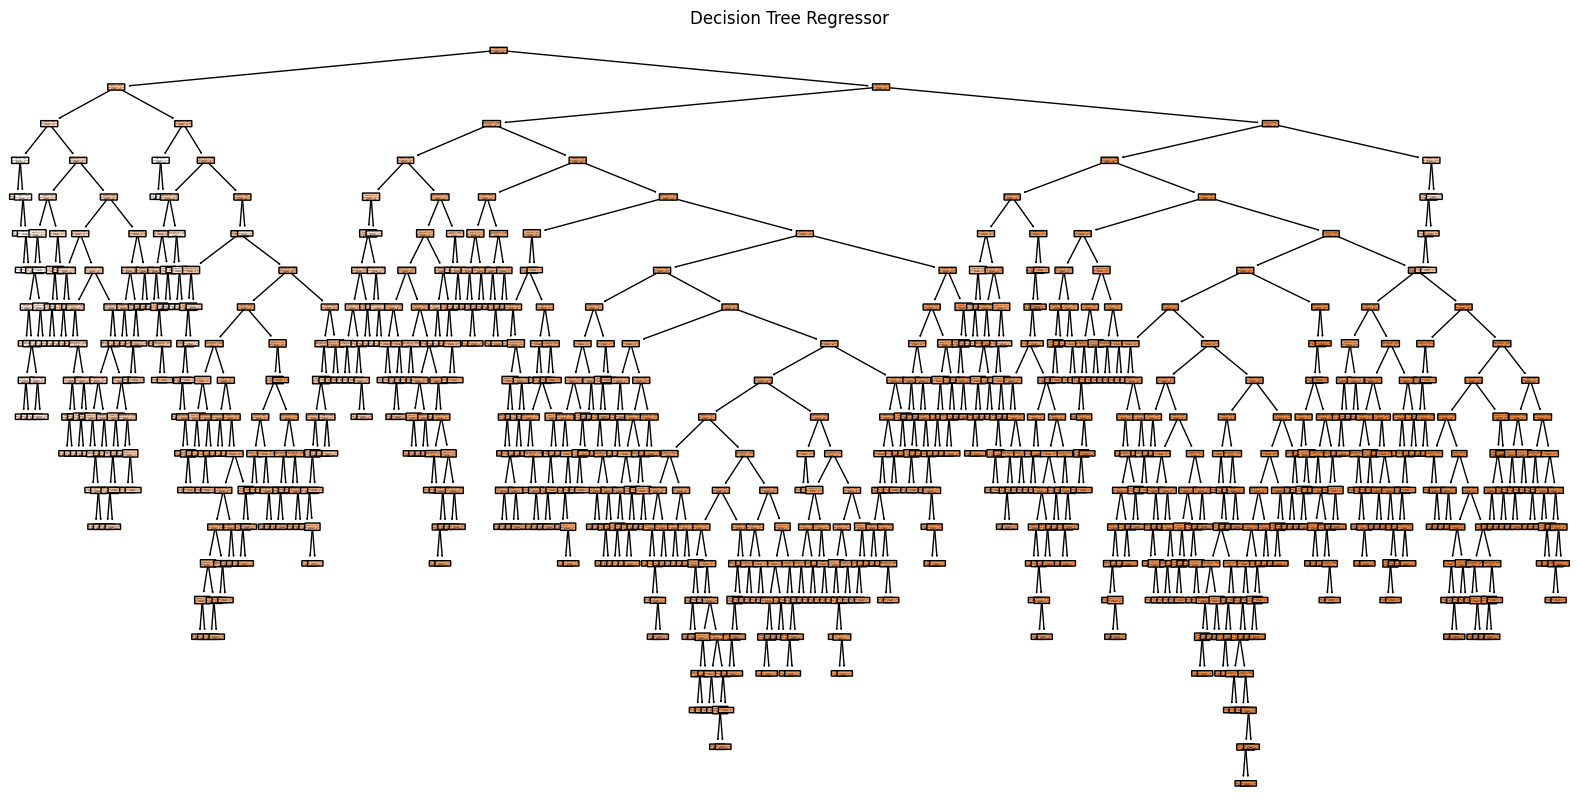

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=52)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", scores)
print("Mean R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.81906935 0.73930115 0.67151884 0.76407466 0.73315633]
Mean R-squared score: 0.7454240683487788


**Random** Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=None,           # None allows full growth; tune between 5-30
    min_samples_split=2,      # Minimum samples required to split a node
    min_samples_leaf=1,       # Minimum samples required at a leaf
    max_features=None,        # Number of features to consider for best split

)

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.40345077, 7.90830061, 7.27368351, 8.85843334, 8.78772833,
       8.7575816 , 7.5428921 , 8.8926262 , 7.64666025, 6.91185188,
       8.41012265, 7.69931487, 8.30295895, 7.703467  , 8.39153002,
       8.28474462, 8.50681285, 8.33420224, 7.68301212, 8.86177533,
       7.50126342, 8.23590582, 7.85285771, 8.93498581, 8.42332691,
       8.36948429, 8.30934158, 7.9241808 , 7.47729397, 7.92022881,
       8.06830726, 7.75636536, 8.08594501, 8.55776866, 7.75748105,
       7.86426671, 8.00688447, 8.92346077, 8.4362838 , 8.898635  ,
       8.42001252, 8.8593234 , 8.99632092, 8.38947425, 8.50406823,
       7.19222828, 7.99311577, 8.85950645, 8.40079009, 8.71007169,
       8.33052919, 8.48964919, 8.89810694, 8.06187516, 8.19570931,
       8.93540809, 7.5856291 , 8.43159873, 8.8988308 , 8.662681  ,
       7.18488005, 7.61590288, 7.95075159, 8.55358897, 8.4211416 ,
       8.68167402, 8.3784052 , 7.93636614, 8.84182021, 8.62826779,
       8.72894213, 8.54557514, 8.93025688, 8.32009635, 8.12790

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.403451  8.435549
337   7.908301  8.156223
39    7.273684  7.380879
648   8.858433  8.947806
526   8.787728  8.794522
..         ...       ...
402   8.284702  8.383662
494   8.536725  8.458928
228   8.368947  8.454040
145   8.447510  8.450412
28    6.879660  7.001246

[216 rows x 2 columns]

**Evaluation metric**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7734437313879907

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.10978503762750871

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.08683897619482407

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.2946845367419608)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.017154799823567244


1.7154799823567244

**Random Forest Regressor Parameter**


In [ ]:
# Create Random Forest Regressor object
clf = RandomForestRegressor(n_estimators=100, criterion="poisson", max_depth=15, bootstrap=True) # 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'

# Train Random Forest Regressor
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7872966249642727

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1097827963884782

In [ ]:
mean_squared_error(y_test,y_pred)

0.08152916462849596

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.28553312352246624)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.017011836665013047


1.7011836665013047

**Bagging**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

from sklearn.ensemble import BaggingRegressor

In [ ]:
base_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=52)


In [ ]:
model= BaggingRegressor(
    estimator=base_tree,
    n_estimators=500,        # number of trees
    max_samples=0.8,         # fraction of samples for each tree
    max_features=1.0,        # fraction of features for each tree
    random_state=42,
    n_jobs=-1
)

In [ ]:
#model = BaggingRegressor()

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=52),
                 max_samples=0.8, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.3995967 , 7.93027805, 7.26638421, 8.85772983, 8.78641861,
       8.75373755, 7.53739483, 8.89450063, 7.64541987, 6.90867056,
       8.43101746, 7.69748439, 8.2775173 , 7.69884875, 8.39296256,
       8.28826078, 8.50980056, 8.32064099, 7.8478522 , 8.85846781,
       7.49092172, 8.23971733, 7.89641198, 8.92839751, 8.41926652,
       8.37875707, 8.3024202 , 7.90288179, 7.49855056, 7.90617259,
       8.0685382 , 7.7748055 , 8.08314829, 8.55910072, 7.76555556,
       7.86196933, 7.99914139, 8.91732964, 8.42740646, 8.88454695,
       8.42104585, 8.85239926, 8.9912042 , 8.38936008, 8.50532215,
       7.18536789, 7.98158684, 8.85886041, 8.39653113, 8.70442402,
       8.33644692, 8.49280294, 8.8957306 , 8.05046408, 8.12750827,
       8.92755434, 7.58519168, 8.42707507, 8.90034934, 8.66971287,
       7.15892222, 7.63242623, 7.96545931, 8.55600081, 8.41882985,
       8.67908081, 8.38212572, 7.92956127, 8.84030408, 8.61778335,
       8.72150521, 8.5546646 , 8.92554031, 8.29408418, 8.14340

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.399597  8.435549
337   7.930278  8.156223
39    7.266384  7.380879
648   8.857730  8.947806
526   8.786419  8.794522
..         ...       ...
402   8.272309  8.383662
494   8.552496  8.458928
228   8.376929  8.454040
145   8.445521  8.450412
28    6.892583  7.001246

[216 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7755231131951176

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.10913749898341175

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2 Score: 0.7755231131951176
MAE: 0.10913749898341175
MSE: 0.08604194952963706
RMSE: 0.29332908060681107
MAPE: 0.017048732241599238


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.08604194952963706

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.29332908060681107)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.017048732241599238


1.7048732241599238

**Bagging Regressor parameter**

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7720597261356296

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1137513086760049

In [ ]:
mean_squared_error(y_test,y_pred)

0.08736946515414358

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.2955832626420914)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.017601485724242763


1.7601485724242762

**Boosting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

seperating the features


In [ ]:
data.weekday.unique()

array([1, 0])

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 46)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.47579423, 8.37236582, 7.75332154, 7.40643676, 6.48863477,
       7.42641012, 7.76408957, 8.45335883, 8.64082905, 8.26955688,
       8.7200856 , 8.73064415, 7.75332154, 8.29916355, 7.48971431,
       8.75868342, 8.64082905, 8.7200856 , 8.39429983, 7.85796675,
       8.64614113, 8.29916355, 7.46615622, 7.89081913, 8.61309363,
       8.36066411, 7.84341437, 7.84548556, 7.85796675, 8.26688817,
       7.44707178, 7.48971431, 8.11477951, 8.550717  , 8.29916355,
       8.26688817, 7.89081913, 8.64079055, 8.64082905, 8.5786282 ,
       8.11477951, 8.39429983, 8.64079055, 8.7216814 , 8.47579423,
       8.26955688, 7.89081913, 8.75868342, 8.37236582, 8.64082905,
       7.98995581, 7.94793768, 8.52512016, 7.46615622, 8.11477951,
       8.53747219, 8.75868342, 8.37762742, 8.11514724, 8.36071291,
       7.85796675, 8.42747732, 7.89081913, 8.37236582, 7.96035002,
       7.73922405, 8.26688817, 8.52512016, 8.29916355, 8.7216814 ,
       8.36071291, 8.64082905, 8.64082905, 8.7216814 , 7.09966

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.475794  8.544419
195   8.372366  8.619389
373   7.753322  7.773174
18    7.406437  7.408531
667   6.488635  3.091042
..         ...       ...
521   8.640791  8.853808
311   8.114780  8.344030
210   8.394300  8.406262
159   8.266888  8.272571
139   8.372366  8.500454

[144 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.708495783065634

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.2131060468995717

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.14224458937055412

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3771532703962066)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.031170292680631553


3.1170292680631553

ADABoosting Regressor Parameter


In [ ]:
# Create Boosting Regressor object
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear') #'linear', 'square', 'exponential'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7463258684363683

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1382134683188379

In [ ]:
mean_squared_error(y_test,y_pred)

0.12378473648744921

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3518305508159421)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02246933247010498


2.246933247010498

**GradientBoost_Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.57708458, 8.53250024, 7.92798644, 7.35587429, 6.94066178,
       7.6003115 , 7.70139869, 8.57649741, 8.78202004, 8.19566633,
       8.88248177, 8.89317302, 8.02667581, 8.58004799, 7.71722762,
       8.74003758, 8.58335808, 8.81158801, 8.44046297, 7.59071744,
       8.92143537, 8.42033545, 7.32394261, 7.8330067 , 8.7907476 ,
       8.42589283, 7.70313709, 8.06752023, 8.05371259, 8.35439499,
       7.29866712, 7.45262222, 8.23406225, 8.63639989, 8.43074942,
       8.3194243 , 8.03735935, 8.73896369, 8.85480334, 8.76876406,
       8.28458452, 8.43884409, 8.7907476 , 8.71233985, 8.67362161,
       8.37382637, 7.86581057, 8.87958939, 8.48397318, 8.8643475 ,
       8.25999656, 8.04033142, 8.5896058 , 7.36456385, 8.22870068,
       8.82877532, 8.84987931, 8.38770898, 8.03361262, 8.47171255,
       8.1218565 , 8.45654908, 8.12837727, 8.47932169, 7.8191971 ,
       7.93628865, 8.3390848 , 8.67813161, 8.39144984, 8.81901397,
       8.42589283, 8.81288117, 8.80976177, 8.82569019, 6.74892

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.577085  8.544419
195   8.532500  8.619389
373   7.927986  7.773174
18    7.355874  7.408531
667   6.940662  3.091042
..         ...       ...
521   8.831414  8.853808
311   8.247663  8.344030
210   8.416563  8.406262
159   8.303471  8.272571
139   8.449964  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7213648471044023

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13255413693709817

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13596490412610326

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3687341916965435)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.022203961560048446


2.2203961560048446

GradientBoosting Regressor Parameter

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.3127033483955608

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.2350174956809424

In [ ]:
mean_squared_error(y_test,y_pred)

0.33537844155867735

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5791186765756026)

**XGBoost_Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.592266 , 8.541733 , 7.8541727, 7.426721 , 6.4740005, 7.8979473,
       7.3511877, 8.563087 , 8.7805605, 8.184383 , 8.904502 , 8.931401 ,
       8.030746 , 8.667532 , 7.8480477, 8.6798115, 8.517187 , 8.902601 ,
       8.376352 , 7.6787186, 8.977466 , 8.475681 , 7.408856 , 7.69387  ,
       8.722427 , 8.406096 , 7.6470532, 7.436144 , 8.121139 , 8.41723  ,
       7.305231 , 7.3526144, 8.308512 , 8.696032 , 8.455289 , 8.356768 ,
       7.835464 , 8.698372 , 8.861359 , 8.744641 , 8.312427 , 8.474639 ,
       8.708898 , 8.820504 , 8.756707 , 8.315289 , 7.882272 , 8.845178 ,
       8.480409 , 8.89601  , 8.215165 , 8.042483 , 8.541921 , 7.367533 ,
       8.1858015, 8.898546 , 8.78911  , 8.416739 , 7.9213243, 8.493869 ,
       8.156102 , 8.533527 , 8.224313 , 8.506791 , 7.73137  , 7.936573 ,
       8.288046 , 8.652913 , 8.299826 , 8.784011 , 8.428352 , 8.82751  ,
       8.771029 , 8.816384 , 6.8153863, 8.641974 , 8.502248 , 7.51965  ,
       6.0743055, 7.994571 , 7.518483 , 8.691002 , 

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.592266  8.544419
195   8.541733  8.619389
373   7.854173  7.773174
18    7.426721  7.408531
667   6.474000  3.091042
..         ...       ...
521   8.832327  8.853808
311   8.305845  8.344030
210   8.443983  8.406262
159   8.250936  8.272571
139   8.411913  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7699210845055585

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.12844483284323321

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.11227103745362989

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3350687055719019)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020885350300041815


2.0885350300041816

**XGBoosting Regressor Parameter**

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7775075195089454

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.12291677956879411

In [ ]:
mean_squared_error(y_test,y_pred)

0.1085691035907447

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.32949826037590046)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02014852514242969


2.014852514242969

# **75:25**

In [ ]:
x = data.drop(['count'], axis=1)
y = data['count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state= 42)



**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:

x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:

#y_train_log = np.log1p(y_train)

In [ ]:
x_train

instant  year  weekday  workingday  atemperature    casual  month_1  \
368      369     1        0           1      0.119337  4.564348        1   
637      638     1        1           0      0.530296  7.859413        0   
253      254     0        0           0      0.609229  7.398786        0   
352      353     0        0           1      0.280933  5.564520        0   
443      444     1        0           1      0.532821  6.890609        0   
..       ...   ...      ...         ...           ...       ...      ...   
74        75     0        0           1      0.366930  5.774552        0   
111      112     0        1           1      0.321954  5.181784        0   
275      276     0        0           1      0.392046  5.802118        0   
446      447     1        0           1      0.531567  7.196687        0   
107      108     0        0           1      0.503146  6.507278        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
368        0        0        0        0        0        0        0        0   
637        0        0        0        0        0        0        0        1   
253        0        0        0        0        0        0        0        1   
352        0        0        0        0        0        0        0        0   
443        0        1        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
74         0        1        0        0        0        0        0        0   
111        0        0        1        0        0        0        0        0   
275        0        0        0        0        0        0        0        0   
446        0        1        0        0        0        0        0        0   
107        0        0        1        0        0        0        0        0   

     month_10  month_11  month_12  
368         0         0         0  
637         0         0         0  
253         0         0         0  
352         0         0         1  
443         0         0         0  
..        ...       ...       ...  
74          0         0         0  
111         0         0         0  
275         1         0         0  
446         0         0         0  
107         0         0         0  

[537 rows x 18 columns]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear

Predicted    Actual
125   8.473609  8.435549
337   7.924979  8.156223
39    7.176556  7.380879
648   8.843705  8.947806
526   8.811283  8.794522
..         ...       ...
265   7.927429  7.781139
355   7.892141  8.028781
603   8.513487  8.566935
218   8.217337  8.238801
661   8.858512  8.918115

[180 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8137672091779976

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.13466249278187112

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.07492136299234385

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.01995181222194771

In [ ]:
model.coef_

array([-0.00209416,  1.05573574, -0.03825181,  0.5032177 ,  0.16576853,
        0.49901321, -0.31044123, -0.20209119, -0.3660215 , -0.26967674,
       -0.14251361, -0.04169276, -0.03558866,  0.03506244,  0.21530476,
        0.29202011,  0.41586873,  0.40976965])

In [ ]:
model.intercept_

np.float64(4.9447223465168815)

**SVM_Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
import random
random.seed(42)
np.random.seed(42)

In [ ]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

In [ ]:
#y_train_log = np.log1p(y_train)

In [ ]:
model.fit(x_train, y_train)

SVR(C=10, gamma=0.1)

In [ ]:

y_pred_= model.predict(x_test)
#y_pred = np.expm1(y_pred_log)

In [ ]:
y_pred

array([8.47360882, 7.92497946, 7.17655572, 8.84370541, 8.81128304,
       8.83918008, 7.61058582, 8.93038677, 7.62002911, 6.017857  ,
       8.31834233, 7.70001439, 8.29773939, 7.82152705, 8.48901765,
       8.32619246, 8.59317883, 8.27290958, 8.6211643 , 8.90231181,
       7.65186316, 8.21363689, 7.91197184, 8.93493637, 8.46066385,
       8.3616736 , 8.16223874, 8.01085504, 7.52749594, 7.75746289,
       7.67932286, 7.87994548, 7.93404344, 8.38140118, 7.84313958,
       7.78284583, 8.04598272, 9.06912399, 8.27444565, 8.98546867,
       8.39310401, 8.88035007, 8.98924247, 8.2839028 , 8.55805185,
       7.31467441, 7.68778774, 8.92519089, 8.25375019, 8.71592356,
       8.35189102, 8.53665428, 8.95222758, 7.95073818, 8.15384359,
       8.90177547, 7.72843376, 8.47657416, 8.98240452, 8.67846516,
       7.03456236, 7.7084843 , 7.91315104, 8.67261004, 8.43933038,
       8.78250758, 8.47486005, 7.97880863, 8.79414321, 8.79442754,
       8.75459528, 8.46656443, 8.88765806, 8.57968545, 8.19349

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8137672091779976

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13466249278187112

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.07492136299234385

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.27371767022306737)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.01995181222194771


1.995181222194771

In [ ]:
#plt.scatter(x_test['holiday'], y_test, label='Test Data')
#plt.scatter(x_test['holiday'], y_pred, color='red', linewidth=1, label='SVM points')
#plt.xlabel('holiday')
#plt.ylabel('Count')
#plt.title('SVM Regression')
#plt.legend()
#plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
model=KNeighborsRegressor(n_neighbors=5,p=2,weights='distance',n_jobs=-1)

In [ ]:
model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
y_pred

array([8.39562831, 7.39245668, 7.33106105, 8.86637168, 8.86501426,
       8.82311252, 7.51638355, 8.77768189, 7.57697551, 7.8793183 ,
       8.54697913, 7.93278051, 8.48263709, 7.63199408, 8.39895902,
       8.58768773, 8.44480874, 8.38217326, 8.51230564, 8.82676774,
       7.27280805, 8.38699139, 8.56092659, 8.89116577, 8.41067769,
       8.40890724, 8.41484955, 7.62822366, 7.52556415, 8.14285567,
       8.10638886, 8.41303994, 8.16353455, 8.62059381, 7.77077188,
       8.09146717, 7.62064156, 8.87846642, 8.37572466, 8.90743185,
       8.42787994, 8.89268806, 8.94516418, 8.50672388, 8.47125767,
       7.43688676, 7.98511146, 8.86598978, 8.34871782, 8.71781123,
       8.20528879, 8.49210799, 8.90744208, 8.06458222, 8.53810957,
       8.92994317, 7.57810015, 8.46741922, 8.83925295, 8.67036422,
       6.94687696, 7.80832045, 8.04494369, 8.60595545, 8.39560518,
       8.79916831, 8.4268377 , 7.96615017, 8.87850381, 8.62228914,
       8.72466921, 8.58088395, 8.90481547, 8.08554588, 8.09299

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted    Actual
125   8.395628  8.435549
337   7.392457  8.156223
39    7.331061  7.380879
648   8.866372  8.947806
526   8.865014  8.794522
..         ...       ...
265   8.284476  7.781139
355   8.150850  8.028781
603   8.584523  8.566935
218   8.394306  8.238801
661   8.894120  8.918115

[180 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5771129233583113

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.16581404169100938

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.1701272693922379

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.41246487049473424)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.026116495046001494


2.6116495046001496

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling is MUST for KNN)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # Manhattan vs Euclidean
}

# Grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Best model
best_knn = grid.best_estimator_
r2_test = best_knn.score(x_test, y_test)
print("Test R²:", r2_test)


Best Params: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV R²: 0.7322880729744959
Test R²: 0.5771129233583113


**Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.50045387, 8.19257047, 7.33823815, 8.93471861, 8.64593815,
       8.73407719, 7.53101633, 8.9096406 , 7.61480536, 6.44094654,
       8.45892828, 7.61775958, 8.19505769, 7.69256965, 8.40245551,
       8.52951694, 8.4854961 , 8.37839079, 7.91169052, 8.82232218,
       7.50218649, 8.20494517, 8.56788631, 8.95738174, 8.4316353 ,
       8.28349413, 8.11701409, 8.08301992, 7.53101633, 8.13798045,
       8.18227974, 7.61480536, 8.02387999, 8.7316592 , 7.81237821,
       7.93808873, 8.08301992, 8.94441979, 8.42354164, 8.89370998,
       8.28349413, 8.83360848, 9.01517671, 8.36030544, 8.61522693,
       7.2943773 , 7.79276172, 8.86149186, 8.33086361, 8.55043453,
       8.43272403, 8.4854961 , 8.9365612 , 8.26023429, 8.19505769,
       8.9506625 , 7.58933582, 8.47428569, 8.92385758, 8.62783971,
       7.1861443 , 7.79605797, 8.13241267, 8.61232154, 8.4316353 ,
       8.60575337, 8.41383068, 7.97693876, 8.84173743, 8.67368399,
       8.72469505, 8.56921622, 8.91314654, 8.32312289, 8.04750

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.500454  8.435549
337   8.192570  8.156223
39    7.338238  7.380879
648   8.934719  8.947806
526   8.645938  8.794522
..         ...       ...
265   7.789869  7.781139
355   8.218518  8.028781
603   8.422663  8.566935
218   8.374246  8.238801
661   8.923858  8.918115

[180 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.760135011828691

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.14365484658424393

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09649757042578629

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3106405807775061)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.021503510605193944


2.1503510605193945

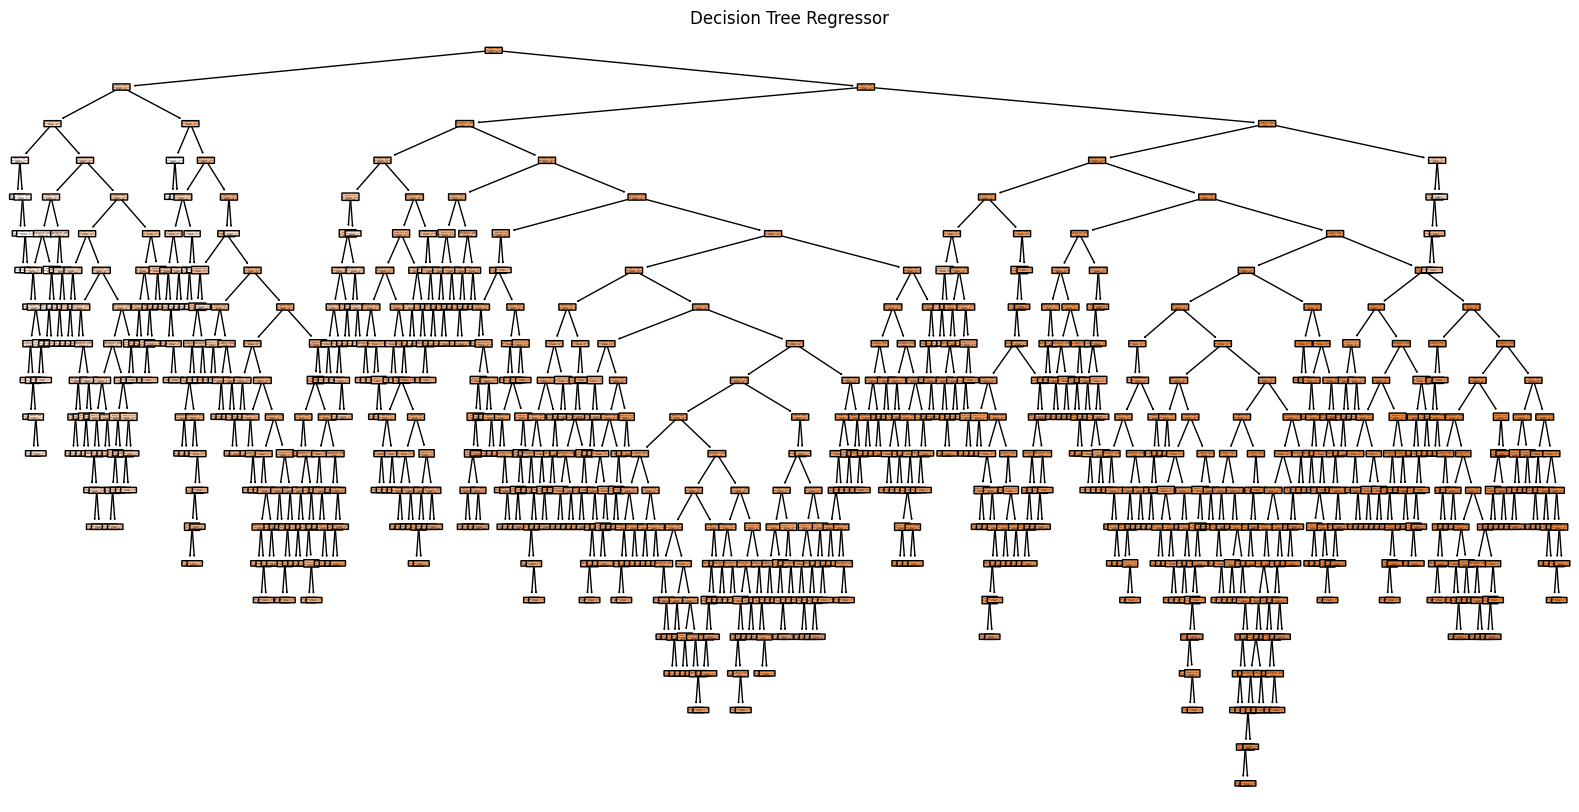

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=52)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", scores)
print("Mean R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.88108544 0.79375045 0.72035426 0.83792299 0.80703365]
Mean R-squared score: 0.8080293580161412


**Random** Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=None,           # None allows full growth; tune between 5-30
    min_samples_split=2,      # Minimum samples required to split a node
    min_samples_leaf=1,       # Minimum samples required at a leaf
    max_features=None,        # Number of features to consider for best split

)

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.42014108, 7.88385261, 7.28029017, 8.87267199, 8.77357943,
       8.74709358, 7.51966036, 8.91172808, 7.63960815, 6.92196675,
       8.4286481 , 7.6872811 , 8.28588778, 7.70990774, 8.38582434,
       8.30985124, 8.51694834, 8.33314076, 7.78410736, 8.86113438,
       7.50494776, 8.25278907, 7.81633513, 8.93088967, 8.41519563,
       8.38513489, 8.28260827, 7.89247151, 7.45517993, 7.92406078,
       8.07916496, 7.76593436, 8.04255787, 8.55572096, 7.77205913,
       7.90334158, 7.97403912, 8.92294195, 8.4256523 , 8.89238274,
       8.42218665, 8.85953521, 9.00481045, 8.38861324, 8.50947768,
       7.1658175 , 8.01950709, 8.85752742, 8.38575239, 8.70567821,
       8.32863778, 8.49072872, 8.89976444, 8.08605903, 8.08048916,
       8.93274817, 7.59939218, 8.43270448, 8.8988138 , 8.67038527,
       7.16663952, 7.63589443, 7.98575172, 8.5741228 , 8.41451469,
       8.67702202, 8.38034405, 7.9250801 , 8.84259071, 8.62699746,
       8.72755517, 8.55739117, 8.92400068, 8.32024308, 8.12456

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.420141  8.435549
337   7.883853  8.156223
39    7.280290  7.380879
648   8.872672  8.947806
526   8.773579  8.794522
..         ...       ...
265   7.878324  7.781139
355   8.155522  8.028781
603   8.633385  8.566935
218   8.343574  8.238801
661   8.890676  8.918115

[180 rows x 2 columns]

**Evaluation metric**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7401669727448246

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.11902802632873272

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.10453070303280151

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3233120830293874)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.01909062006709393


1.909062006709393

**Random Forest Regressor Parameter**


In [ ]:
# Create Random Forest Regressor object
clf = RandomForestRegressor(n_estimators=100, criterion="poisson", max_depth=15, bootstrap=True) # 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'

# Train Random Forest Regressor
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.755298272195801

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.11632971075204133

In [ ]:
mean_squared_error(y_test,y_pred)

0.09844338847499093

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3137568939083107)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.018616796081793223


1.8616796081793223

**Bagging**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

from sklearn.ensemble import BaggingRegressor

In [ ]:
base_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=52)


In [ ]:
model= BaggingRegressor(
    estimator=base_tree,
    n_estimators=500,        # number of trees
    max_samples=0.8,         # fraction of samples for each tree
    max_features=1.0,        # fraction of features for each tree
    random_state=42,
    n_jobs=-1
)

In [ ]:
#model = BaggingRegressor()

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=52),
                 max_samples=0.8, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.40664782, 7.9273869 , 7.26504148, 8.87928098, 8.77571704,
       8.75540197, 7.52501489, 8.90382662, 7.63682533, 6.96083665,
       8.42396201, 7.6820202 , 8.26885176, 7.70881299, 8.39760899,
       8.29879577, 8.50274277, 8.32574875, 7.828277  , 8.85552956,
       7.50912167, 8.24589156, 7.81826821, 8.93005344, 8.42127664,
       8.38351843, 8.32081824, 7.90436967, 7.47971727, 7.88846892,
       8.0640541 , 7.76542233, 8.06262005, 8.55254225, 7.7955385 ,
       7.85162897, 7.97979035, 8.91844053, 8.42152378, 8.88369638,
       8.42802024, 8.85174029, 9.00310742, 8.39170888, 8.5075898 ,
       7.15280002, 7.9661893 , 8.86161557, 8.39205697, 8.70566252,
       8.33925275, 8.48763307, 8.89577907, 8.07703117, 8.11509213,
       8.92944505, 7.58404101, 8.43908948, 8.89199734, 8.67718167,
       7.1741375 , 7.62030961, 7.99505033, 8.56508932, 8.41917528,
       8.68435118, 8.38055178, 7.92850638, 8.85018621, 8.61150315,
       8.72945041, 8.56309601, 8.92486291, 8.29655343, 8.14428

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.406648  8.435549
337   7.927387  8.156223
39    7.265041  7.380879
648   8.879281  8.947806
526   8.775717  8.794522
..         ...       ...
265   7.889801  7.781139
355   8.150139  8.028781
603   8.658264  8.566935
218   8.358929  8.238801
661   8.878969  8.918115

[180 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7388969973487773

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.11766433524676574

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2 Score: 0.7388969973487773
MAE: 0.11766433524676574
MSE: 0.10504161352938281
RMSE: 0.32410123962950654
MAPE: 0.018935213623580242


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.10504161352938281

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.32410123962950654)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.018935213623580242


1.8935213623580243

**Bagging Regressor parameter**

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7382893776641408

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1204683704188192

In [ ]:
mean_squared_error(y_test,y_pred)

0.10528605863893102

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3244781327592524)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.01922053391392802


1.9220533913928022

**Boosting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

seperating the features


In [ ]:
data.weekday.unique()

array([1, 0])

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 46)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.47579423, 8.37236582, 7.75332154, 7.40643676, 6.48863477,
       7.42641012, 7.76408957, 8.45335883, 8.64082905, 8.26955688,
       8.7200856 , 8.73064415, 7.75332154, 8.29916355, 7.48971431,
       8.75868342, 8.64082905, 8.7200856 , 8.39429983, 7.85796675,
       8.64614113, 8.29916355, 7.46615622, 7.89081913, 8.61309363,
       8.36066411, 7.84341437, 7.84548556, 7.85796675, 8.26688817,
       7.44707178, 7.48971431, 8.11477951, 8.550717  , 8.29916355,
       8.26688817, 7.89081913, 8.64079055, 8.64082905, 8.5786282 ,
       8.11477951, 8.39429983, 8.64079055, 8.7216814 , 8.47579423,
       8.26955688, 7.89081913, 8.75868342, 8.37236582, 8.64082905,
       7.98995581, 7.94793768, 8.52512016, 7.46615622, 8.11477951,
       8.53747219, 8.75868342, 8.37762742, 8.11514724, 8.36071291,
       7.85796675, 8.42747732, 7.89081913, 8.37236582, 7.96035002,
       7.73922405, 8.26688817, 8.52512016, 8.29916355, 8.7216814 ,
       8.36071291, 8.64082905, 8.64082905, 8.7216814 , 7.09966

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.475794  8.544419
195   8.372366  8.619389
373   7.753322  7.773174
18    7.406437  7.408531
667   6.488635  3.091042
..         ...       ...
521   8.640791  8.853808
311   8.114780  8.344030
210   8.394300  8.406262
159   8.266888  8.272571
139   8.372366  8.500454

[144 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.708495783065634

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.2131060468995717

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.14224458937055412

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3771532703962066)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.031170292680631553


3.1170292680631553

ADABoosting Regressor Parameter


In [ ]:
# Create Boosting Regressor object
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear') #'linear', 'square', 'exponential'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7463258684363683

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1382134683188379

In [ ]:
mean_squared_error(y_test,y_pred)

0.12378473648744921

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3518305508159421)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02246933247010498


2.246933247010498

**GradientBoost_Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.57708458, 8.53250024, 7.92798644, 7.35587429, 6.94066178,
       7.6003115 , 7.70139869, 8.57649741, 8.78202004, 8.19566633,
       8.88248177, 8.89317302, 8.02667581, 8.58004799, 7.71722762,
       8.74003758, 8.58335808, 8.81158801, 8.44046297, 7.59071744,
       8.92143537, 8.42033545, 7.32394261, 7.8330067 , 8.7907476 ,
       8.42589283, 7.70313709, 8.06752023, 8.05371259, 8.35439499,
       7.29866712, 7.45262222, 8.23406225, 8.63639989, 8.43074942,
       8.3194243 , 8.03735935, 8.73896369, 8.85480334, 8.76876406,
       8.28458452, 8.43884409, 8.7907476 , 8.71233985, 8.67362161,
       8.37382637, 7.86581057, 8.87958939, 8.48397318, 8.8643475 ,
       8.25999656, 8.04033142, 8.5896058 , 7.36456385, 8.22870068,
       8.82877532, 8.84987931, 8.38770898, 8.03361262, 8.47171255,
       8.1218565 , 8.45654908, 8.12837727, 8.47932169, 7.8191971 ,
       7.93628865, 8.3390848 , 8.67813161, 8.39144984, 8.81901397,
       8.42589283, 8.81288117, 8.80976177, 8.82569019, 6.74892

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.577085  8.544419
195   8.532500  8.619389
373   7.927986  7.773174
18    7.355874  7.408531
667   6.940662  3.091042
..         ...       ...
521   8.831414  8.853808
311   8.247663  8.344030
210   8.416563  8.406262
159   8.303471  8.272571
139   8.449964  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7213648471044023

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13255413693709817

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13596490412610326

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3687341916965435)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.022203961560048446


2.2203961560048446

GradientBoosting Regressor Parameter

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.3127033483955608

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.2350174956809424

In [ ]:
mean_squared_error(y_test,y_pred)

0.33537844155867735

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5791186765756026)

**XGBoost_Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.592266 , 8.541733 , 7.8541727, 7.426721 , 6.4740005, 7.8979473,
       7.3511877, 8.563087 , 8.7805605, 8.184383 , 8.904502 , 8.931401 ,
       8.030746 , 8.667532 , 7.8480477, 8.6798115, 8.517187 , 8.902601 ,
       8.376352 , 7.6787186, 8.977466 , 8.475681 , 7.408856 , 7.69387  ,
       8.722427 , 8.406096 , 7.6470532, 7.436144 , 8.121139 , 8.41723  ,
       7.305231 , 7.3526144, 8.308512 , 8.696032 , 8.455289 , 8.356768 ,
       7.835464 , 8.698372 , 8.861359 , 8.744641 , 8.312427 , 8.474639 ,
       8.708898 , 8.820504 , 8.756707 , 8.315289 , 7.882272 , 8.845178 ,
       8.480409 , 8.89601  , 8.215165 , 8.042483 , 8.541921 , 7.367533 ,
       8.1858015, 8.898546 , 8.78911  , 8.416739 , 7.9213243, 8.493869 ,
       8.156102 , 8.533527 , 8.224313 , 8.506791 , 7.73137  , 7.936573 ,
       8.288046 , 8.652913 , 8.299826 , 8.784011 , 8.428352 , 8.82751  ,
       8.771029 , 8.816384 , 6.8153863, 8.641974 , 8.502248 , 7.51965  ,
       6.0743055, 7.994571 , 7.518483 , 8.691002 , 

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.592266  8.544419
195   8.541733  8.619389
373   7.854173  7.773174
18    7.426721  7.408531
667   6.474000  3.091042
..         ...       ...
521   8.832327  8.853808
311   8.305845  8.344030
210   8.443983  8.406262
159   8.250936  8.272571
139   8.411913  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7699210845055585

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.12844483284323321

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.11227103745362989

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3350687055719019)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020885350300041815


2.0885350300041816

**XGBoosting Regressor Parameter**

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7775075195089454

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.12291677956879411

In [ ]:
mean_squared_error(y_test,y_pred)

0.1085691035907447

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.32949826037590046)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02014852514242969


2.014852514242969

# **80:20**

In [ ]:
x = data.drop(['count'], axis=1)
y = data['count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 42)



**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:

x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:

#y_train_log = np.log1p(y_train)

In [ ]:
x_train

instant  year  weekday  workingday  atemperature    casual  month_1  \
58        59     0        0           1      0.400118  4.406719        0   
209      210     0        1           1      0.785967  6.508769        0   
325      326     0        0           1      0.421696  4.248495        0   
541      542     1        0           1      0.654042  7.038784        0   
24        25     0        0           1      0.234526  5.231109        1   
..       ...   ...      ...         ...           ...       ...      ...   
74        75     0        0           1      0.366930  5.774552        0   
111      112     0        1           1      0.321954  5.181784        0   
275      276     0        0           1      0.392046  5.802118        0   
446      447     1        0           1      0.531567  7.196687        0   
107      108     0        0           1      0.503146  6.507278        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
58         1        0        0        0        0        0        0        0   
209        0        0        0        0        0        1        0        0   
325        0        0        0        0        0        0        0        0   
541        0        0        0        0        1        0        0        0   
24         0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
74         0        1        0        0        0        0        0        0   
111        0        0        1        0        0        0        0        0   
275        0        0        0        0        0        0        0        0   
446        0        1        0        0        0        0        0        0   
107        0        0        1        0        0        0        0        0   

     month_10  month_11  month_12  
58          0         0         0  
209         0         0         0  
325         0         1         0  
541         0         0         0  
24          0         0         0  
..        ...       ...       ...  
74          0         0         0  
111         0         0         0  
275         1         0         0  
446         0         0         0  
107         0         0         0  

[573 rows x 18 columns]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear

Predicted    Actual
125   8.472819  8.435549
337   7.937019  8.156223
39    7.174424  7.380879
648   8.842732  8.947806
526   8.812148  8.794522
..         ...       ...
137   8.239754  8.257126
298   8.185937  8.267192
41    7.652923  7.465083
113   8.246883  8.340695
269   8.265414  8.323608

[144 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7907656927165654

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.14638266395932373

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09093783982738396

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.02224101309489146

In [ ]:
model.coef_

array([-0.00219965,  1.09403786, -0.03851616,  0.50024333,  0.17707714,
        0.49836557, -0.32937929, -0.21616187, -0.37947018, -0.27511677,
       -0.14781758, -0.04613279, -0.03433388,  0.04097667,  0.21781267,
        0.30272152,  0.42928951,  0.43761199])

In [ ]:
model.intercept_

np.float64(4.96480713392668)

**SVM_Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
import random
random.seed(42)
np.random.seed(42)

In [ ]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

In [ ]:
#y_train_log = np.log1p(y_train)

In [ ]:
model.fit(x_train, y_train)

SVR(C=10, gamma=0.1)

In [ ]:

y_pred_= model.predict(x_test)
#y_pred = np.expm1(y_pred_log)

In [ ]:
y_pred

array([8.47281884, 7.93701905, 7.17442406, 8.84273232, 8.81214828,
       8.83587832, 7.60691037, 8.93136297, 7.61541802, 6.01776092,
       8.31814359, 7.70207515, 8.30616084, 7.81548627, 8.49313251,
       8.32300778, 8.5891392 , 8.26644452, 8.62605233, 8.90217394,
       7.65087158, 8.21768826, 7.90734062, 8.93515493, 8.46273894,
       8.36089486, 8.1666795 , 8.00722022, 7.52121318, 7.75247935,
       7.68731748, 7.87965587, 7.93142993, 8.38200302, 7.83899543,
       7.77963926, 8.04211053, 9.06647914, 8.27597488, 8.98861107,
       8.39174786, 8.88402533, 8.9854532 , 8.2795073 , 8.5608565 ,
       7.31499719, 7.69631902, 8.92282755, 8.25938855, 8.72035374,
       8.35361898, 8.53444906, 8.95410261, 7.94852197, 8.16253012,
       8.90167902, 7.72426695, 8.4800015 , 8.97943205, 8.67986714,
       7.03128872, 7.70850856, 7.91949113, 8.66889119, 8.44133921,
       8.7809245 , 8.4726753 , 7.97803945, 8.79464403, 8.79113586,
       8.75169127, 8.46396465, 8.88785539, 8.57937559, 8.19713

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7907656927165654

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.14638266395932373

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09093783982738396

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3015590154967746)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02224101309489146


2.224101309489146

In [ ]:
#plt.scatter(x_test['holiday'], y_test, label='Test Data')
#plt.scatter(x_test['holiday'], y_pred, color='red', linewidth=1, label='SVM points')
#plt.xlabel('holiday')
#plt.ylabel('Count')
#plt.title('SVM Regression')
#plt.legend()
#plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
model=KNeighborsRegressor(n_neighbors=5,p=2,weights='distance',n_jobs=-1)

In [ ]:
model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
y_pred

array([8.39572955, 7.3925285 , 7.33106131, 8.86737987, 8.86503388,
       8.81463574, 7.51641357, 8.76590894, 7.57691733, 7.879285  ,
       8.54698158, 7.93258193, 8.48269733, 7.63204666, 8.39899636,
       8.58766417, 8.36290597, 8.38212933, 8.51233359, 8.8267815 ,
       7.27282239, 8.31307091, 8.52013174, 8.80358891, 8.41068178,
       8.40896375, 8.34798872, 7.62824182, 7.52550446, 8.14287459,
       8.11524276, 8.41303611, 8.1634882 , 8.6205736 , 7.7115904 ,
       8.09136854, 7.62066562, 8.87844538, 8.37570039, 8.90741742,
       8.42787131, 8.89268128, 8.9451772 , 8.50675526, 8.47126724,
       7.44789821, 7.98517849, 8.86599069, 8.34875903, 8.71778556,
       8.25555361, 8.49209938, 8.90742901, 8.06470257, 8.53807856,
       8.92993711, 7.57813568, 8.4674246 , 8.84297755, 8.67038123,
       6.94716769, 7.80815428, 8.04484018, 8.60594967, 8.39559948,
       8.79065958, 8.42687013, 7.96612389, 8.87848673, 8.62228892,
       8.72467856, 8.50940427, 8.90484349, 7.96894497, 8.09297

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted    Actual
125   8.395730  8.435549
337   7.392529  8.156223
39    7.331061  7.380879
648   8.867380  8.947806
526   8.865034  8.794522
..         ...       ...
137   8.376918  8.257126
298   8.356708  8.267192
41    7.343169  7.465083
113   8.141882  8.340695
269   8.379462  8.323608

[144 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.532555640948474

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.16993694198149814

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.20316161724883292

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.45073453079260845)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02795196310182095


2.795196310182095

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling is MUST for KNN)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # Manhattan vs Euclidean
}

# Grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Best model
best_knn = grid.best_estimator_
r2_test = best_knn.score(x_test, y_test)
print("Test R²:", r2_test)


Best Params: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV R²: 0.728434928232669
Test R²: 0.5404607506802395


**Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.50045387, 7.1831117 , 7.33823815, 8.82143735, 8.80762149,
       8.73664995, 7.59337419, 8.78508064, 7.66575343, 6.44094654,
       8.45892828, 7.61775958, 8.19505769, 7.69256965, 8.37239861,
       8.51519119, 8.4854961 , 8.40200678, 7.49331725, 8.82907995,
       7.50218649, 8.17244682, 8.56788631, 8.87835804, 8.4316353 ,
       8.28349413, 8.23880117, 8.08301992, 7.52348131, 8.09925056,
       8.18813341, 7.66575343, 8.13241267, 8.7316592 , 7.43425738,
       8.09925056, 8.08301992, 8.92252496, 8.42354164, 8.92718139,
       8.31996102, 8.86855404, 9.01517671, 8.30300938, 8.61522693,
       7.12929755, 7.79276172, 8.86149186, 8.33086361, 8.73793386,
       8.38935982, 8.4854961 , 8.90204735, 7.50494207, 8.19505769,
       8.9506625 , 7.58933582, 8.47219583, 8.80071663, 8.57508467,
       7.1861443 , 7.79605797, 8.13241267, 8.61232154, 8.4316353 ,
       8.60575337, 8.52951694, 7.97693876, 8.83404564, 8.67368399,
       8.72469505, 8.53444354, 8.94923531, 8.331827  , 8.09162

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.500454  8.435549
337   7.183112  8.156223
39    7.338238  7.380879
648   8.821437  8.947806
526   8.807621  8.794522
..         ...       ...
137   8.261526  8.257126
298   8.180321  8.267192
41    7.443078  7.465083
113   8.583355  8.340695
269   8.378391  8.323608

[144 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7234339726215647

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.15350475914060144

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.12020168884334399

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3467011520652102)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.023672661580439947


2.3672661580439947

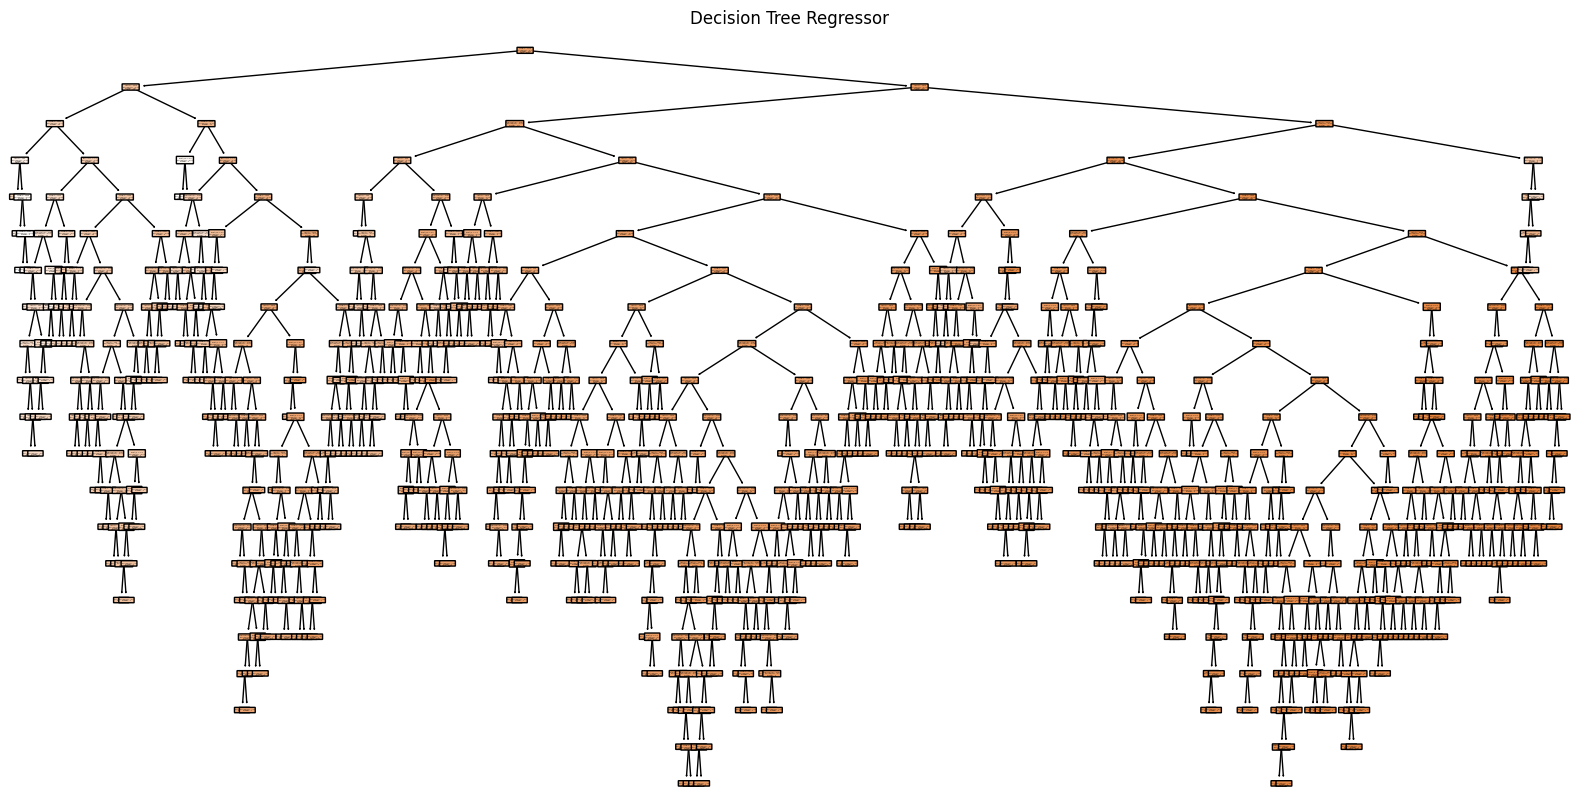

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=52)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", scores)
print("Mean R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.8555779  0.82104493 0.68346228 0.76293082 0.84548269]
Mean R-squared score: 0.7936997243899564


**Random** Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=None,           # None allows full growth; tune between 5-30
    min_samples_split=2,      # Minimum samples required to split a node
    min_samples_leaf=1,       # Minimum samples required at a leaf
    max_features=None,        # Number of features to consider for best split

)

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.41942784, 7.87747049, 7.28850383, 8.87896054, 8.75977956,
       8.74325017, 7.57924781, 8.8634617 , 7.64076925, 6.85860204,
       8.41163675, 7.66053064, 8.27866869, 7.63795971, 8.38372774,
       8.28683583, 8.51284474, 8.31931141, 7.7269995 , 8.8621422 ,
       7.49159197, 8.21579105, 7.90725807, 8.92160138, 8.43441319,
       8.38161959, 8.29681535, 7.88402672, 7.51048939, 7.91350565,
       8.07733565, 7.71743545, 8.03584743, 8.53623327, 7.66123126,
       7.86071598, 7.96310844, 8.91437215, 8.42665795, 8.89893477,
       8.42454962, 8.85556092, 9.00407778, 8.39871689, 8.50967327,
       7.14013161, 8.00067064, 8.85965031, 8.39243151, 8.71191694,
       8.36169733, 8.49696849, 8.89365944, 8.04315518, 8.07539131,
       8.92568134, 7.6007499 , 8.4416937 , 8.89479516, 8.6559335 ,
       7.14970497, 7.64427174, 7.99975612, 8.57895884, 8.42862708,
       8.66564124, 8.37364072, 7.90690697, 8.82560233, 8.61397844,
       8.73076204, 8.50300318, 8.92497737, 8.31110788, 8.14247

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.419428  8.435549
337   7.877470  8.156223
39    7.288504  7.380879
648   8.878961  8.947806
526   8.759780  8.794522
..         ...       ...
137   8.315551  8.257126
298   8.347411  8.267192
41    7.437547  7.465083
113   8.503150  8.340695
269   8.316842  8.323608

[144 rows x 2 columns]

**Evaluation metric**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7209405311461115

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.1245609522848854

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.12128539344445688

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.34826052524576606)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020705533957869435


2.0705533957869435

**Random Forest Regressor Parameter**


In [ ]:
# Create Random Forest Regressor object
clf = RandomForestRegressor(n_estimators=100, criterion="poisson", max_depth=15, bootstrap=True) # 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'

# Train Random Forest Regressor
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7256458099456502

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.12375568741353546

In [ ]:
mean_squared_error(y_test,y_pred)

0.11924037561076095

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.345311997490329)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02047590418730285


2.047590418730285

**Bagging**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

from sklearn.ensemble import BaggingRegressor

In [ ]:
base_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=52)


In [ ]:
model= BaggingRegressor(
    estimator=base_tree,
    n_estimators=500,        # number of trees
    max_samples=0.8,         # fraction of samples for each tree
    max_features=1.0,        # fraction of features for each tree
    random_state=42,
    n_jobs=-1
)

In [ ]:
#model = BaggingRegressor()

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=52),
                 max_samples=0.8, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.41207719, 7.92885107, 7.27479931, 8.87037019, 8.77954515,
       8.75029611, 7.55649026, 8.86802489, 7.63410336, 6.96429441,
       8.42532854, 7.67432783, 8.27130545, 7.65456062, 8.38869999,
       8.30008912, 8.5117611 , 8.30927519, 7.82518291, 8.85573026,
       7.48871968, 8.21692739, 7.89715107, 8.91713391, 8.4271384 ,
       8.38155966, 8.30754772, 7.8728838 , 7.50679536, 7.91071429,
       8.04344077, 7.76198565, 8.04171342, 8.54345129, 7.690202  ,
       7.85593169, 7.94449695, 8.91264534, 8.42578922, 8.88954519,
       8.42350986, 8.85396418, 8.99955355, 8.39111023, 8.50692654,
       7.18960589, 8.01251956, 8.85459683, 8.38677704, 8.70990901,
       8.36470231, 8.49609492, 8.8883256 , 8.0295516 , 8.06605819,
       8.92111981, 7.60695368, 8.43817807, 8.9094261 , 8.66243462,
       7.15367148, 7.60715215, 7.98225872, 8.55667567, 8.41837208,
       8.67124656, 8.36922392, 7.89768601, 8.82777304, 8.61006507,
       8.73061202, 8.51788252, 8.91803607, 8.29646783, 8.14429

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.412077  8.435549
337   7.928851  8.156223
39    7.274799  7.380879
648   8.870370  8.947806
526   8.779545  8.794522
..         ...       ...
137   8.322283  8.257126
298   8.338866  8.267192
41    7.436784  7.465083
113   8.478465  8.340695
269   8.307034  8.323608

[144 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7096863537834835

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.12298784438523436

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2 Score: 0.7096863537834835
MAE: 0.12298784438523436
MSE: 0.1261767068799981
RMSE: 0.35521360739701136
MAPE: 0.02064636982641782


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.1261767068799981

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.35521360739701136)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02064636982641782


2.0646369826417823

**Bagging Regressor parameter**

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.727683971626619

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1255900712714297

In [ ]:
mean_squared_error(y_test,y_pred)

0.11835454563912447

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.34402695481477097)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020740122025708126


2.0740122025708128

**Boosting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

seperating the features


In [ ]:
data.weekday.unique()

array([1, 0])

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 46)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.47579423, 8.37236582, 7.75332154, 7.40643676, 6.48863477,
       7.42641012, 7.76408957, 8.45335883, 8.64082905, 8.26955688,
       8.7200856 , 8.73064415, 7.75332154, 8.29916355, 7.48971431,
       8.75868342, 8.64082905, 8.7200856 , 8.39429983, 7.85796675,
       8.64614113, 8.29916355, 7.46615622, 7.89081913, 8.61309363,
       8.36066411, 7.84341437, 7.84548556, 7.85796675, 8.26688817,
       7.44707178, 7.48971431, 8.11477951, 8.550717  , 8.29916355,
       8.26688817, 7.89081913, 8.64079055, 8.64082905, 8.5786282 ,
       8.11477951, 8.39429983, 8.64079055, 8.7216814 , 8.47579423,
       8.26955688, 7.89081913, 8.75868342, 8.37236582, 8.64082905,
       7.98995581, 7.94793768, 8.52512016, 7.46615622, 8.11477951,
       8.53747219, 8.75868342, 8.37762742, 8.11514724, 8.36071291,
       7.85796675, 8.42747732, 7.89081913, 8.37236582, 7.96035002,
       7.73922405, 8.26688817, 8.52512016, 8.29916355, 8.7216814 ,
       8.36071291, 8.64082905, 8.64082905, 8.7216814 , 7.09966

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.475794  8.544419
195   8.372366  8.619389
373   7.753322  7.773174
18    7.406437  7.408531
667   6.488635  3.091042
..         ...       ...
521   8.640791  8.853808
311   8.114780  8.344030
210   8.394300  8.406262
159   8.266888  8.272571
139   8.372366  8.500454

[144 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.708495783065634

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.2131060468995717

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.14224458937055412

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3771532703962066)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.031170292680631553


3.1170292680631553

ADABoosting Regressor Parameter


In [ ]:
# Create Boosting Regressor object
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear') #'linear', 'square', 'exponential'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7463258684363683

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1382134683188379

In [ ]:
mean_squared_error(y_test,y_pred)

0.12378473648744921

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3518305508159421)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02246933247010498


2.246933247010498

**GradientBoost_Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.57708458, 8.53250024, 7.92798644, 7.35587429, 6.94066178,
       7.6003115 , 7.70139869, 8.57649741, 8.78202004, 8.19566633,
       8.88248177, 8.89317302, 8.02667581, 8.58004799, 7.71722762,
       8.74003758, 8.58335808, 8.81158801, 8.44046297, 7.59071744,
       8.92143537, 8.42033545, 7.32394261, 7.8330067 , 8.7907476 ,
       8.42589283, 7.70313709, 8.06752023, 8.05371259, 8.35439499,
       7.29866712, 7.45262222, 8.23406225, 8.63639989, 8.43074942,
       8.3194243 , 8.03735935, 8.73896369, 8.85480334, 8.76876406,
       8.28458452, 8.43884409, 8.7907476 , 8.71233985, 8.67362161,
       8.37382637, 7.86581057, 8.87958939, 8.48397318, 8.8643475 ,
       8.25999656, 8.04033142, 8.5896058 , 7.36456385, 8.22870068,
       8.82877532, 8.84987931, 8.38770898, 8.03361262, 8.47171255,
       8.1218565 , 8.45654908, 8.12837727, 8.47932169, 7.8191971 ,
       7.93628865, 8.3390848 , 8.67813161, 8.39144984, 8.81901397,
       8.42589283, 8.81288117, 8.80976177, 8.82569019, 6.74892

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.577085  8.544419
195   8.532500  8.619389
373   7.927986  7.773174
18    7.355874  7.408531
667   6.940662  3.091042
..         ...       ...
521   8.831414  8.853808
311   8.247663  8.344030
210   8.416563  8.406262
159   8.303471  8.272571
139   8.449964  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7213648471044023

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13255413693709817

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13596490412610326

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3687341916965435)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.022203961560048446


2.2203961560048446

GradientBoosting Regressor Parameter

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.3127033483955608

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.2350174956809424

In [ ]:
mean_squared_error(y_test,y_pred)

0.33537844155867735

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5791186765756026)

**XGBoost_Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.592266 , 8.541733 , 7.8541727, 7.426721 , 6.4740005, 7.8979473,
       7.3511877, 8.563087 , 8.7805605, 8.184383 , 8.904502 , 8.931401 ,
       8.030746 , 8.667532 , 7.8480477, 8.6798115, 8.517187 , 8.902601 ,
       8.376352 , 7.6787186, 8.977466 , 8.475681 , 7.408856 , 7.69387  ,
       8.722427 , 8.406096 , 7.6470532, 7.436144 , 8.121139 , 8.41723  ,
       7.305231 , 7.3526144, 8.308512 , 8.696032 , 8.455289 , 8.356768 ,
       7.835464 , 8.698372 , 8.861359 , 8.744641 , 8.312427 , 8.474639 ,
       8.708898 , 8.820504 , 8.756707 , 8.315289 , 7.882272 , 8.845178 ,
       8.480409 , 8.89601  , 8.215165 , 8.042483 , 8.541921 , 7.367533 ,
       8.1858015, 8.898546 , 8.78911  , 8.416739 , 7.9213243, 8.493869 ,
       8.156102 , 8.533527 , 8.224313 , 8.506791 , 7.73137  , 7.936573 ,
       8.288046 , 8.652913 , 8.299826 , 8.784011 , 8.428352 , 8.82751  ,
       8.771029 , 8.816384 , 6.8153863, 8.641974 , 8.502248 , 7.51965  ,
       6.0743055, 7.994571 , 7.518483 , 8.691002 , 

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.592266  8.544419
195   8.541733  8.619389
373   7.854173  7.773174
18    7.426721  7.408531
667   6.474000  3.091042
..         ...       ...
521   8.832327  8.853808
311   8.305845  8.344030
210   8.443983  8.406262
159   8.250936  8.272571
139   8.411913  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7699210845055585

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.12844483284323321

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.11227103745362989

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3350687055719019)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020885350300041815


2.0885350300041816

**XGBoosting Regressor Parameter**

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7775075195089454

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.12291677956879411

In [ ]:
mean_squared_error(y_test,y_pred)

0.1085691035907447

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.32949826037590046)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02014852514242969


2.014852514242969

# **60:40**

In [ ]:
x = data.drop(['count'], axis=1)
y = data['count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .4, random_state= 42)



**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:

x

instant  year  weekday  workingday  atemperature    casual  month_1  \
0          1     0        1           0      0.363625  5.805135        1   
1          2     0        0           0      0.353739  4.882802        1   
2          3     0        0           1      0.189405  4.795791        1   
3          4     0        0           1      0.212122  4.691348        1   
4          5     0        0           1      0.229270  4.418841        1   
..       ...   ...      ...         ...           ...       ...      ...   
726      727     1        0           1      0.226642  5.513429        0   
727      728     1        1           1      0.255046  6.469250        0   
728      729     1        1           0      0.242400  5.075174        0   
729      730     1        0           0      0.231700  5.899897        0   
730      731     1        0           1      0.223487  6.086775        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
726        0        0        0        0        0        0        0        0   
727        0        0        0        0        0        0        0        0   
728        0        0        0        0        0        0        0        0   
729        0        0        0        0        0        0        0        0   
730        0        0        0        0        0        0        0        0   

     month_10  month_11  month_12  
0           0         0         0  
1           0         0         0  
2           0         0         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
726         0         0         1  
727         0         0         1  
728         0         0         1  
729         0         0         1  
730         0         0         1  

[717 rows x 18 columns]

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:

#y_train_log = np.log1p(y_train)

In [ ]:
x_train

instant  year  weekday  workingday  atemperature    casual  month_1  \
130      131     0        0           1      0.528400  6.311735        0   
599      600     1        0           1      0.621854  6.998510        0   
295      296     0        0           0      0.422333  7.390181        0   
243      244     0        0           1      0.614921  6.664409        0   
0          1     0        1           0      0.363625  5.805135        1   
..       ...   ...      ...         ...           ...       ...      ...   
74        75     0        0           1      0.366930  5.774552        0   
111      112     0        1           1      0.321954  5.181784        0   
275      276     0        0           1      0.392046  5.802118        0   
446      447     1        0           1      0.531567  7.196687        0   
107      108     0        0           1      0.503146  6.507278        0   

     month_2  month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
130        0        0        0        1        0        0        0        0   
599        0        0        0        0        0        0        1        0   
295        0        0        0        0        0        0        0        0   
243        0        0        0        0        0        0        0        1   
0          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
74         0        1        0        0        0        0        0        0   
111        0        0        1        0        0        0        0        0   
275        0        0        0        0        0        0        0        0   
446        0        1        0        0        0        0        0        0   
107        0        0        1        0        0        0        0        0   

     month_10  month_11  month_12  
130         0         0         0  
599         0         0         0  
295         1         0         0  
243         0         0         0  
0           0         0         0  
..        ...       ...       ...  
74          0         0         0  
111         0         0         0  
275         1         0         0  
446         0         0         0  
107         0         0         0  

[430 rows x 18 columns]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear

Predicted    Actual
125   8.496816  8.435549
337   7.987036  8.156223
39    7.187992  7.380879
648   8.839318  8.947806
526   8.805953  8.794522
..         ...       ...
276   8.328133  8.402007
241   8.391901  8.557183
91    7.903005  7.719574
618   9.027874  8.925986
122   8.353048  8.400884

[287 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8323037629457943

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.13986545766870143

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.06354362773185843

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.019486572904747385

In [ ]:
model.coef_

array([-0.00208309,  1.04176194, -0.04948882,  0.52085468,  0.02949171,
        0.51542218, -0.32275555, -0.21290106, -0.36710163, -0.27379919,
       -0.13239296, -0.03330791, -0.01193297,  0.02482186,  0.21654959,
        0.27768376,  0.38374848,  0.45138758])

In [ ]:
model.intercept_

np.float64(4.90309606404549)

**SVM_Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
import random
random.seed(42)
np.random.seed(42)

In [ ]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

In [ ]:
#y_train_log = np.log1p(y_train)

In [ ]:
model.fit(x_train, y_train)

SVR(C=10, gamma=0.1)

In [ ]:

y_pred_= model.predict(x_test)
#y_pred = np.expm1(y_pred_log)

In [ ]:
y_pred

array([8.49681585, 7.98703626, 7.1879921 , 8.83931776, 8.80595268,
       8.83559559, 7.63348128, 8.93603593, 7.63707914, 5.93110018,
       8.316888  , 7.7039175 , 8.35579077, 7.85206464, 8.47052819,
       8.33906633, 8.59066527, 8.27612433, 8.69303882, 8.91356686,
       7.64967338, 8.19001771, 7.89033114, 8.91195503, 8.47834168,
       8.38292936, 8.13790377, 8.03001669, 7.55353249, 7.74810095,
       7.72190418, 7.9032959 , 7.93112532, 8.37991895, 7.86808735,
       7.77965971, 8.0624035 , 9.07252802, 8.28704493, 8.96373982,
       8.41949136, 8.85529246, 8.98295259, 8.28922825, 8.53925086,
       7.31070955, 7.75651642, 8.93778914, 8.22115705, 8.73174927,
       8.35590687, 8.55182447, 8.936767  , 7.92615342, 8.1986946 ,
       8.88969357, 7.7618683 , 8.46382806, 8.97109845, 8.69218311,
       7.03438308, 7.70051982, 7.98762413, 8.66137525, 8.45621117,
       8.76558271, 8.47531079, 7.96461664, 8.77414536, 8.7799192 ,
       8.76125898, 8.45309072, 8.88800052, 8.5774727 , 8.20883

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8323037629457943

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13986545766870143

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.06354362773185843

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.25207861418981664)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.019486572904747385


1.9486572904747386

In [ ]:
#plt.scatter(x_test['holiday'], y_test, label='Test Data')
#plt.scatter(x_test['holiday'], y_pred, color='red', linewidth=1, label='SVM points')
#plt.xlabel('holiday')
#plt.ylabel('Count')
#plt.title('SVM Regression')
#plt.legend()
#plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
model=KNeighborsRegressor(n_neighbors=5,p=2,weights='distance',n_jobs=-1)

In [ ]:
model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
y_pred

array([8.39203715, 7.55797744, 7.33719393, 8.86460592, 8.85329484,
       8.81565784, 7.4962666 , 8.78854282, 7.57781894, 7.50792581,
       8.66338092, 7.93232405, 8.48270626, 7.62708912, 8.3827711 ,
       8.58763282, 8.44384343, 8.36734441, 8.45940267, 8.83320142,
       7.35515638, 8.39281731, 8.56474478, 8.90107294, 8.41786758,
       8.40905002, 8.50881375, 7.6192604 , 7.49217157, 8.14290422,
       8.12250002, 8.41303113, 8.20296605, 8.61872526, 7.87064354,
       8.12397835, 7.60996264, 8.59485927, 8.37566899, 8.9074058 ,
       8.42788403, 8.89266525, 8.9044429 , 8.50668531, 8.39867773,
       7.46688641, 8.1232733 , 8.86021493, 8.34447355, 8.71850824,
       8.19769459, 8.49208164, 8.90746485, 8.06486853, 8.53804213,
       8.92991353, 7.53484147, 8.4406584 , 8.83962053, 8.67039907,
       6.96864108, 7.80792931, 8.1570061 , 8.60600636, 8.4186905 ,
       8.79189306, 8.4240192 , 7.94284615, 8.87850229, 8.50764876,
       8.73902401, 8.56774057, 8.90425429, 8.08563732, 8.05940

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted    Actual
125   8.392037  8.435549
337   7.557977  8.156223
39    7.337194  7.380879
648   8.864606  8.947806
526   8.853295  8.794522
..         ...       ...
276   8.427100  8.402007
241   8.501063  8.557183
91    7.890362  7.719574
618   8.959606  8.925986
122   8.389725  8.400884

[287 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6606998936550446

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.1637535540645648

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.12856793942248518

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.35856371738156273)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02371162027184851


2.3711620271848513

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling is MUST for KNN)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]   # Manhattan vs Euclidean
}

# Grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Best model
best_knn = grid.best_estimator_
r2_test = best_knn.score(x_test, y_test)
print("Test R²:", r2_test)


Best Params: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'distance'}
Best CV R²: 0.687438367720902
Test R²: 0.6550396720382583


**Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.11701409, 8.20220844, 7.33823815, 8.93471861, 8.64593815,
       8.655737  , 7.42952084, 8.83302531, 7.66575343, 6.08904488,
       8.31213511, 7.65681009, 8.56921622, 7.70841067, 8.37239861,
       8.51519119, 8.4854961 , 8.37839079, 7.91169052, 8.89370998,
       7.50218649, 8.20494517, 8.56788631, 8.95738174, 8.44591199,
       8.38958707, 8.11701409, 7.97074039, 7.33693691, 7.93808873,
       8.18227974, 7.97693876, 8.18813341, 8.38183155, 7.70074779,
       7.93808873, 8.04462628, 8.94102198, 8.42354164, 8.89370998,
       8.476996  , 8.83360848, 9.01517671, 8.46800295, 8.61522693,
       7.12929755, 8.10470347, 8.86149186, 8.33086361, 8.51639287,
       8.28349413, 8.49515206, 8.93326848, 7.50494207, 8.19505769,
       8.9506625 , 7.66528472, 8.47470314, 8.92385758, 8.62550933,
       7.25911613, 7.74543561, 8.33110455, 8.69717869, 8.44591199,
       8.73407719, 8.52951694, 7.97693876, 8.88405606, 8.54597499,
       8.71489585, 8.53444354, 8.94128376, 8.29978317, 8.14002

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.117014  8.435549
337   8.202208  8.156223
39    7.338238  7.380879
648   8.934719  8.947806
526   8.645938  8.794522
..         ...       ...
276   8.234034  8.402007
241   8.485496  8.557183
91    7.708411  7.719574
618   8.957639  8.925986
122   8.338545  8.400884

[287 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7812421087871415

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.14140499457298725

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0828919613631107

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.28790964096936855)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.019882539134482263


1.9882539134482262

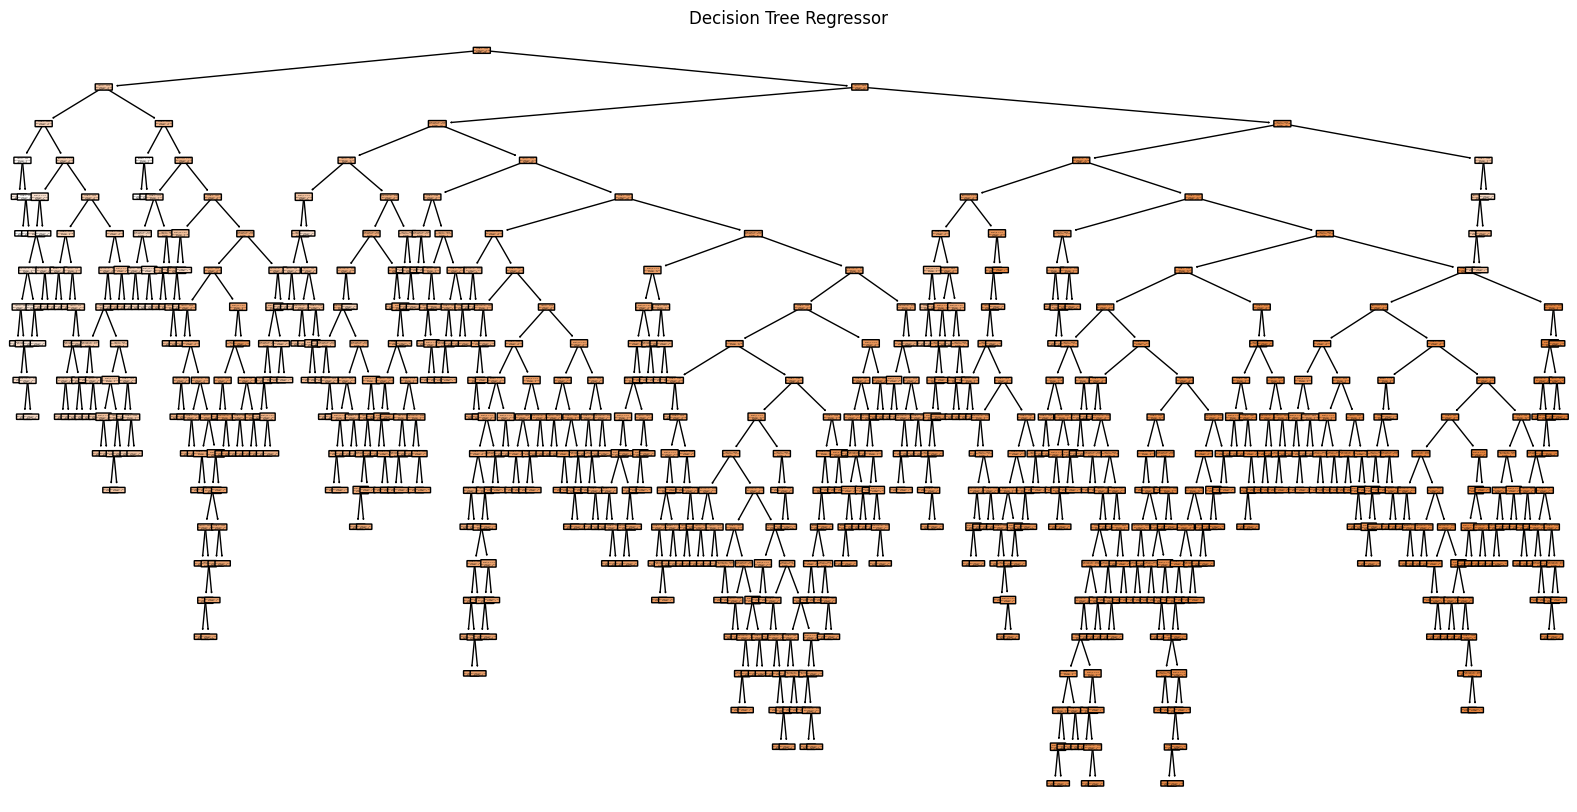

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=x.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=52)

# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", scores)
print("Mean R-squared score:", scores.mean())

Cross-validation R-squared scores: [0.7775336  0.84175931 0.89897201 0.72432597 0.82100344]
Mean R-squared score: 0.8127188650937842


**Random** Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_depth=None,           # None allows full growth; tune between 5-30
    min_samples_split=2,      # Minimum samples required to split a node
    min_samples_leaf=1,       # Minimum samples required at a leaf
    max_features=None,        # Number of features to consider for best split

)

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.35972124, 7.88429146, 7.27251873, 8.85713561, 8.78004719,
       8.74296401, 7.54990629, 8.91709497, 7.66243272, 6.59918525,
       8.41571102, 7.68125033, 8.42808349, 7.70729176, 8.38566603,
       8.35325482, 8.49051237, 8.30104311, 7.91898826, 8.86242307,
       7.53148694, 8.2424731 , 7.9255028 , 8.92763208, 8.43941017,
       8.37872137, 8.3091747 , 7.88778377, 7.51130049, 7.94520293,
       8.1210415 , 7.93202407, 8.08310394, 8.51037459, 7.87289275,
       7.91349426, 7.98432528, 8.89814417, 8.44025892, 8.88787439,
       8.43707669, 8.86065744, 8.99853044, 8.37208001, 8.50548748,
       7.2239419 , 8.0977755 , 8.86247601, 8.38408182, 8.64639021,
       8.31904628, 8.49608857, 8.89645733, 8.02516968, 8.36259761,
       8.93637802, 7.64808777, 8.43755959, 8.90476588, 8.66281382,
       7.20632614, 7.75163998, 8.13463521, 8.59403917, 8.44087787,
       8.68228353, 8.39286719, 8.01692321, 8.84984517, 8.56228816,
       8.71264468, 8.54804786, 8.90796704, 8.32220034, 8.18538

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.359721  8.435549
337   7.884291  8.156223
39    7.272519  7.380879
648   8.857136  8.947806
526   8.780047  8.794522
..         ...       ...
276   8.349439  8.402007
241   8.511526  8.557183
91    7.869536  7.719574
618   8.950620  8.925986
122   8.343607  8.400884

[287 rows x 2 columns]

**Evaluation metric**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8074470124793823

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.11235510613824236

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.07296237275564113

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.2701154804072531)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.016649614819897317


1.6649614819897316

**Random Forest Regressor Parameter**


In [ ]:
# Create Random Forest Regressor object
clf = RandomForestRegressor(n_estimators=100, criterion="poisson", max_depth=15, bootstrap=True) # 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'

# Train Random Forest Regressor
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8115972420035789

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.11102853630183815

In [ ]:
mean_squared_error(y_test,y_pred)

0.07138976358730262

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.26718862922531456)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.01650677352295421


1.650677352295421

**Bagging**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:

from sklearn.ensemble import BaggingRegressor

In [ ]:
base_tree = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, random_state=52)


In [ ]:
model= BaggingRegressor(
    estimator=base_tree,
    n_estimators=500,        # number of trees
    max_samples=0.8,         # fraction of samples for each tree
    max_features=1.0,        # fraction of features for each tree
    random_state=42,
    n_jobs=-1
)

In [ ]:
#model = BaggingRegressor()

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=52),
                 max_samples=0.8, n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.349758  , 7.89782294, 7.23879738, 8.85784167, 8.78145669,
       8.74549567, 7.54606935, 8.91135102, 7.64669911, 6.79473641,
       8.42871363, 7.68497902, 8.43591786, 7.71589361, 8.39021734,
       8.35231859, 8.49669312, 8.29322202, 7.94440777, 8.8596118 ,
       7.54268321, 8.23529225, 7.95519211, 8.93135333, 8.44135005,
       8.39160752, 8.3336029 , 7.86006299, 7.52991229, 7.91743496,
       8.11784839, 7.96434735, 8.10597074, 8.50584899, 7.87869536,
       7.90019958, 7.96411276, 8.8882762 , 8.43647903, 8.88188638,
       8.43874793, 8.85325593, 8.99781151, 8.38214256, 8.49723824,
       7.23959546, 8.08365618, 8.8575146 , 8.39331291, 8.66399639,
       8.33087985, 8.49531613, 8.89355233, 8.03001346, 8.28303763,
       8.93252662, 7.64376569, 8.44368054, 8.90281852, 8.66217476,
       7.17524236, 7.76965691, 8.14185985, 8.56769799, 8.44127936,
       8.67959524, 8.38487148, 8.02781575, 8.84387201, 8.55911836,
       8.70547022, 8.54006716, 8.9139488 , 8.32267882, 8.18375

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
125   8.349758  8.435549
337   7.897823  8.156223
39    7.238797  7.380879
648   8.857842  8.947806
526   8.781457  8.794522
..         ...       ...
276   8.320197  8.402007
241   8.509177  8.557183
91    7.875073  7.719574
618   8.952418  8.925986
122   8.341833  8.400884

[287 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7979666865230499

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.11341159203217141

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2 Score: 0.7979666865230499
MAE: 0.11341159203217141
MSE: 0.0765546674542463
RMSE: 0.27668514136875205
MAPE: 0.016905038721121177


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0765546674542463

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.27668514136875205)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.016905038721121177


1.6905038721121177

**Bagging Regressor parameter**

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8042939303587565

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.11726859156654071

In [ ]:
mean_squared_error(y_test,y_pred)

0.07415714182142678

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.2723180894127799)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.017283319795772422


1.7283319795772423

**Boosting**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

seperating the features


In [ ]:
data.weekday.unique()

array([1, 0])

In [ ]:
y

0      6.892642
1      6.685861
2      7.207119
3      7.353722
4      7.377759
         ...   
726    7.656337
727    8.037543
728    7.201171
729    7.493317
730    7.911691
Name: count, Length: 717, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state= 46)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.47579423, 8.37236582, 7.75332154, 7.40643676, 6.48863477,
       7.42641012, 7.76408957, 8.45335883, 8.64082905, 8.26955688,
       8.7200856 , 8.73064415, 7.75332154, 8.29916355, 7.48971431,
       8.75868342, 8.64082905, 8.7200856 , 8.39429983, 7.85796675,
       8.64614113, 8.29916355, 7.46615622, 7.89081913, 8.61309363,
       8.36066411, 7.84341437, 7.84548556, 7.85796675, 8.26688817,
       7.44707178, 7.48971431, 8.11477951, 8.550717  , 8.29916355,
       8.26688817, 7.89081913, 8.64079055, 8.64082905, 8.5786282 ,
       8.11477951, 8.39429983, 8.64079055, 8.7216814 , 8.47579423,
       8.26955688, 7.89081913, 8.75868342, 8.37236582, 8.64082905,
       7.98995581, 7.94793768, 8.52512016, 7.46615622, 8.11477951,
       8.53747219, 8.75868342, 8.37762742, 8.11514724, 8.36071291,
       7.85796675, 8.42747732, 7.89081913, 8.37236582, 7.96035002,
       7.73922405, 8.26688817, 8.52512016, 8.29916355, 8.7216814 ,
       8.36071291, 8.64082905, 8.64082905, 8.7216814 , 7.09966

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.475794  8.544419
195   8.372366  8.619389
373   7.753322  7.773174
18    7.406437  7.408531
667   6.488635  3.091042
..         ...       ...
521   8.640791  8.853808
311   8.114780  8.344030
210   8.394300  8.406262
159   8.266888  8.272571
139   8.372366  8.500454

[144 rows x 2 columns]

Evaluation metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.708495783065634

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.2131060468995717

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.14224458937055412

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3771532703962066)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.031170292680631553


3.1170292680631553

ADABoosting Regressor Parameter


In [ ]:
# Create Boosting Regressor object
from sklearn.ensemble import RandomForestRegressor
base_estimator = RandomForestRegressor(max_depth=12, random_state=42)
br = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.05, loss='linear') #'linear', 'square', 'exponential'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7463258684363683

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.1382134683188379

In [ ]:
mean_squared_error(y_test,y_pred)

0.12378473648744921

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3518305508159421)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02246933247010498


2.246933247010498

**GradientBoost_Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.57708458, 8.53250024, 7.92798644, 7.35587429, 6.94066178,
       7.6003115 , 7.70139869, 8.57649741, 8.78202004, 8.19566633,
       8.88248177, 8.89317302, 8.02667581, 8.58004799, 7.71722762,
       8.74003758, 8.58335808, 8.81158801, 8.44046297, 7.59071744,
       8.92143537, 8.42033545, 7.32394261, 7.8330067 , 8.7907476 ,
       8.42589283, 7.70313709, 8.06752023, 8.05371259, 8.35439499,
       7.29866712, 7.45262222, 8.23406225, 8.63639989, 8.43074942,
       8.3194243 , 8.03735935, 8.73896369, 8.85480334, 8.76876406,
       8.28458452, 8.43884409, 8.7907476 , 8.71233985, 8.67362161,
       8.37382637, 7.86581057, 8.87958939, 8.48397318, 8.8643475 ,
       8.25999656, 8.04033142, 8.5896058 , 7.36456385, 8.22870068,
       8.82877532, 8.84987931, 8.38770898, 8.03361262, 8.47171255,
       8.1218565 , 8.45654908, 8.12837727, 8.47932169, 7.8191971 ,
       7.93628865, 8.3390848 , 8.67813161, 8.39144984, 8.81901397,
       8.42589283, 8.81288117, 8.80976177, 8.82569019, 6.74892

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.577085  8.544419
195   8.532500  8.619389
373   7.927986  7.773174
18    7.355874  7.408531
667   6.940662  3.091042
..         ...       ...
521   8.831414  8.853808
311   8.247663  8.344030
210   8.416563  8.406262
159   8.303471  8.272571
139   8.449964  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7213648471044023

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.13255413693709817

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.13596490412610326

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3687341916965435)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.022203961560048446


2.2203961560048446

GradientBoosting Regressor Parameter

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.3127033483955608

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.2350174956809424

In [ ]:
mean_squared_error(y_test,y_pred)

0.33537844155867735

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5791186765756026)

**XGBoost_Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([8.592266 , 8.541733 , 7.8541727, 7.426721 , 6.4740005, 7.8979473,
       7.3511877, 8.563087 , 8.7805605, 8.184383 , 8.904502 , 8.931401 ,
       8.030746 , 8.667532 , 7.8480477, 8.6798115, 8.517187 , 8.902601 ,
       8.376352 , 7.6787186, 8.977466 , 8.475681 , 7.408856 , 7.69387  ,
       8.722427 , 8.406096 , 7.6470532, 7.436144 , 8.121139 , 8.41723  ,
       7.305231 , 7.3526144, 8.308512 , 8.696032 , 8.455289 , 8.356768 ,
       7.835464 , 8.698372 , 8.861359 , 8.744641 , 8.312427 , 8.474639 ,
       8.708898 , 8.820504 , 8.756707 , 8.315289 , 7.882272 , 8.845178 ,
       8.480409 , 8.89601  , 8.215165 , 8.042483 , 8.541921 , 7.367533 ,
       8.1858015, 8.898546 , 8.78911  , 8.416739 , 7.9213243, 8.493869 ,
       8.156102 , 8.533527 , 8.224313 , 8.506791 , 7.73137  , 7.936573 ,
       8.288046 , 8.652913 , 8.299826 , 8.784011 , 8.428352 , 8.82751  ,
       8.771029 , 8.816384 , 6.8153863, 8.641974 , 8.502248 , 7.51965  ,
       6.0743055, 7.994571 , 7.518483 , 8.691002 , 

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted    Actual
672   8.592266  8.544419
195   8.541733  8.619389
373   7.854173  7.773174
18    7.426721  7.408531
667   6.474000  3.091042
..         ...       ...
521   8.832327  8.853808
311   8.305845  8.344030
210   8.443983  8.406262
159   8.250936  8.272571
139   8.411913  8.500454

[144 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7699210845055585

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.12844483284323321

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.11227103745362989

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.3350687055719019)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.020885350300041815


2.0885350300041816

**XGBoosting Regressor Parameter**

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7775075195089454

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.12291677956879411

In [ ]:
mean_squared_error(y_test,y_pred)

0.1085691035907447

In [ ]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.32949826037590046)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.02014852514242969


2.014852514242969

# ANN[70:30]

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test  = scaler_x.transform(x_test)

# Scale y
scaler_y = StandardScaler()




In [ ]:
x.columns

Index(['instant', 'year', 'weekday', 'workingday', 'atemperature', 'casual',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

tf.random.set_seed(42)

# ---------- Custom R2 metric ----------
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Scale X and y ----------
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(np.array(x_train, dtype=np.float32))
x_test  = scaler_x.transform(np.array(x_test, dtype=np.float32))

y_train = scaler_y.fit_transform(np.array(y_train, dtype=np.float32).reshape(-1,1))
y_test  = scaler_y.transform(np.array(y_test, dtype=np.float32).reshape(-1,1))

# ---------- Model ----------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)   # output is scaled y
])

# ---------- Compile ----------
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_metric
    ]
)

# ---------- Train ----------
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

# ---------- Evaluate on test (inverse transform) ----------
y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()

print("Final Evaluation on Original Scale:")
print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.8771 - mae: 0.6728 - mse: 0.8771 - r2_metric: 0.0727 - rmse: 0.9321 - val_loss: 0.9716 - val_mae: 0.4774 - val_mse: 0.9716 - val_r2_metric: 0.5195 - val_rmse: 0.9857
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2961 - mae: 0.3854 - mse: 0.2961 - r2_metric: 0.6950 - rmse: 0.5428 - val_loss: 0.7289 - val_mae: 0.3677 - val_mse: 0.7289 - val_r2_metric: 0.6723 - val_rmse: 0.8538
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1783 - mae: 0.2851 - mse: 0.1783 - r2_metric: 0.8150 - rmse: 0.4214 - val_loss: 0.6418 - val_mae: 0.3116 - val_mse: 0.6418 - val_r2_metric: 0.7423 - val_rmse: 0.8011
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1312 - mae: 0.2403 - mse: 0.1312 - r2_metric: 0.8633 - rmse: 0.3614 - val_loss: 0.5730 - val_mae: 0.2937 - val_mse: 0.5730 - val_r2_metric: 0.7744 - val_rmse: 0.7570
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1076 - mae: 0.2086 - mse: 

In [ ]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6175 - mae: 0.3105 - mse: 0.6175 - r2_metric: 0.7870 - rmse: 0.7643 


[0.3799237906932831,
 0.2522256672382355,
 0.3799237906932831,
 0.6163795590400696,
 0.8517571687698364]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,405 (150.02 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,604 (100.02 KB)

Text(0.5, 0, 'epochs')

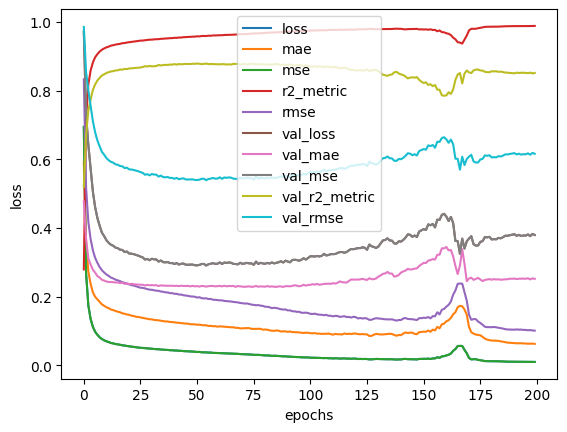

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_train - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_train - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             r2_score])



# STEP1: Fit the model

import numpy as np

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)


history= model.fit(x_train, y_train, epochs= 200, verbose=1)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mae: 0.0620 - mse: 0.0106 - r2_metric: 0.9883 - rmse: 0.1027  
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mae: 0.0633 - mse: 0.0107 - r2_metric: 0.9881 - rmse: 0.1032 
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mae: 0.0605 - mse: 0.0099 - r2_metric: 0.9891 - rmse: 0.0993 
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mae: 0.0626 - mse: 0.0104 - r2_metric: 0.9884 - rmse: 0.1019 
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mae: 0.0619 - mse: 0.0105 - r2_metric: 0.9884 - rmse: 0.1021 
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mae: 0.0609 - mse: 0.0098 - r2_metric: 0.9892 - rmse: 0.0989 
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mae: 0.0602 - mse: 0.0100 - r2_metric: 0.9890 - rmse: 0.0998 
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mae: 0.0612 - mse: 0.

In [ ]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6506 - mae: 0.3348 - mse: 0.6506 - r2_metric: 0.7733 - rmse: 0.7856  


[0.4060506224632263,
 0.2725782096385956,
 0.4060506224632263,
 0.6372210383415222,
 0.8395770788192749]

Text(0.5, 0, 'epochs')

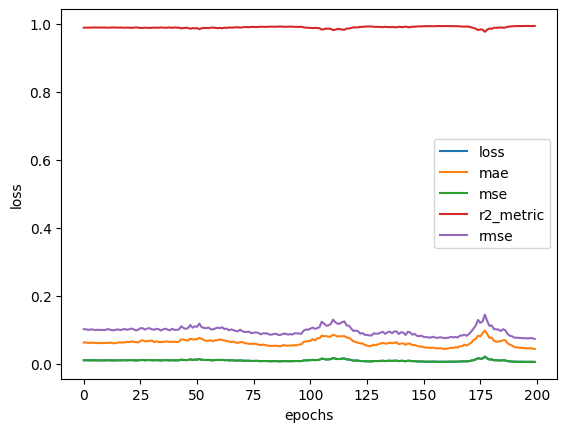

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# ---------- Custom R2 ----------
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Model ----------
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# ---------- Compile ----------
model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# ---------- Prepare Data ----------
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# ---------- Fit ----------
history = model2.fit(
    x_train, y_train,
    epochs=500,
    verbose=1,
    validation_data=(x_test, y_test)
)



Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.7958 - mae: 0.7958 - mape: 238.6488 - mse: 1.2485 - r2_score: -0.3082 - rmse: 1.1168 - val_loss: 0.7656 - val_mae: 0.7656 - val_mape: 493.9263 - val_mse: 1.8515 - val_r2_score: -0.0409 - val_rmse: 1.3607
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7284 - mae: 0.7284 - mape: 188.8196 - mse: 1.0576 - r2_score: -0.1041 - rmse: 1.0280 - val_loss: 0.7362 - val_mae: 0.7362 - val_mape: 674.6189 - val_mse: 1.7288 - val_r2_score: 0.0341 - val_rmse: 1.3148
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6894 - mae: 0.6894 - mape: 164.1640 - mse: 0.9594 - r2_score: 2.7775e-04 - rmse: 0.9791 - val_loss: 0.7084 - val_mae: 0.7084 - val_mape: 719.6145 - val_mse: 1.6624 - val_r2_score: 0.0838 - val_rmse: 1.2894
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6595 - mae: 0.6595 - mape: 155.3881 - mse: 0.9020 - r2_score: 0.0623 - rmse: 0.9493 - val_loss: 0.6785 - val_mae: 0.6785 - val_mape: 743.92

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y.describe()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(8, activation='tanh'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 100)

In [ ]:

model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')

])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
             tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 250)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# Custom R² metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())

# STEP1: Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation=None)  # linear activation for regression
])

# STEP2: Compile the model
model2.compile(
    loss="mae",   # or "mse"
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# Convert data to numpy (float32)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# STEP3: Fit the model
history = model2.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))


In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

75:**25**

# ANN[75:25]

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test  = scaler_x.transform(x_test)

# Scale y
scaler_y = StandardScaler()




In [ ]:
x.columns

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

tf.random.set_seed(42)

# ---------- Custom R2 metric ----------
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Scale X and y ----------
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(np.array(x_train, dtype=np.float32))
x_test  = scaler_x.transform(np.array(x_test, dtype=np.float32))

y_train = scaler_y.fit_transform(np.array(y_train, dtype=np.float32).reshape(-1,1))
y_test  = scaler_y.transform(np.array(y_test, dtype=np.float32).reshape(-1,1))

# ---------- Model ----------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)   # output is scaled y
])

# ---------- Compile ----------
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_metric
    ]
)

# ---------- Train ----------
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

# ---------- Evaluate on test (inverse transform) ----------
y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()

print("Final Evaluation on Original Scale:")
print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.summary();

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_train - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_train - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             r2_score])



# STEP1: Fit the model

import numpy as np

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)


history= model.fit(x_train, y_train, epochs= 200, verbose=1)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# ---------- Custom R2 ----------
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Model ----------
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# ---------- Compile ----------
model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# ---------- Prepare Data ----------
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# ---------- Fit ----------
history = model2.fit(
    x_train, y_train,
    epochs=500,
    verbose=1,
    validation_data=(x_test, y_test)
)



In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y.describe()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(8, activation='tanh'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 100)

In [ ]:

model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')

])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
             tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 250)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# Custom R² metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())

# STEP1: Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation=None)  # linear activation for regression
])

# STEP2: Compile the model
model2.compile(
    loss="mae",   # or "mse"
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# Convert data to numpy (float32)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# STEP3: Fit the model
history = model2.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))


In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# ANN[80:20]

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test  = scaler_x.transform(x_test)

# Scale y
scaler_y = StandardScaler()




In [ ]:
x.columns

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

tf.random.set_seed(42)

# ---------- Custom R2 metric ----------
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Scale X and y ----------
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(np.array(x_train, dtype=np.float32))
x_test  = scaler_x.transform(np.array(x_test, dtype=np.float32))

y_train = scaler_y.fit_transform(np.array(y_train, dtype=np.float32).reshape(-1,1))
y_test  = scaler_y.transform(np.array(y_test, dtype=np.float32).reshape(-1,1))

# ---------- Model ----------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)   # output is scaled y
])

# ---------- Compile ----------
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_metric
    ]
)

# ---------- Train ----------
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

# ---------- Evaluate on test (inverse transform) ----------
y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()

print("Final Evaluation on Original Scale:")
print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.summary();

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_train - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_train - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             r2_score])



# STEP1: Fit the model

import numpy as np

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)


history= model.fit(x_train, y_train, epochs= 200, verbose=1)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# ---------- Custom R2 ----------
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Model ----------
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# ---------- Compile ----------
model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# ---------- Prepare Data ----------
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# ---------- Fit ----------
history = model2.fit(
    x_train, y_train,
    epochs=500,
    verbose=1,
    validation_data=(x_test, y_test)
)



In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y.describe()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(8, activation='tanh'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 100)

In [ ]:

model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')

])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
             tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 250)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# Custom R² metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())

# STEP1: Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation=None)  # linear activation for regression
])

# STEP2: Compile the model
model2.compile(
    loss="mae",   # or "mse"
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# Convert data to numpy (float32)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# STEP3: Fit the model
history = model2.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))


In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# ANN[60:40]

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test  = scaler_x.transform(x_test)

# Scale y
scaler_y = StandardScaler()




In [ ]:
x.columns

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

tf.random.set_seed(42)

# ---------- Custom R2 metric ----------
def r2_metric(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Scale X and y ----------
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_x.fit_transform(np.array(x_train, dtype=np.float32))
x_test  = scaler_x.transform(np.array(x_test, dtype=np.float32))

y_train = scaler_y.fit_transform(np.array(y_train, dtype=np.float32).reshape(-1,1))
y_test  = scaler_y.transform(np.array(y_test, dtype=np.float32).reshape(-1,1))

# ---------- Model ----------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)   # output is scaled y
])

# ---------- Compile ----------
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_metric
    ]
)

# ---------- Train ----------
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

# ---------- Evaluate on test (inverse transform) ----------
y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()

print("Final Evaluation on Original Scale:")
print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model.summary();

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_train - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_train - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())
# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             r2_score])



# STEP1: Fit the model

import numpy as np

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)


history= model.fit(x_train, y_train, epochs= 200, verbose=1)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# ---------- Custom R2 ----------
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

# ---------- Model ----------
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# ---------- Compile ----------
model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# ---------- Prepare Data ----------
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# ---------- Fit ----------
history = model2.fit(
    x_train, y_train,
    epochs=500,
    verbose=1,
    validation_data=(x_test, y_test)
)



In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
y.describe()

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(8, activation='tanh'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 100)

In [ ]:

model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(5, activation='tanh'),
                            tf.keras.layers.Dense(2, activation='tanh'),
                            tf.keras.layers.Dense(1, activation='linear')

])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
             tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score

    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 250)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

# Custom R² metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res/(ss_tot + tf.keras.backend.epsilon())

# STEP1: Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation=None)  # linear activation for regression
])

# STEP2: Compile the model
model2.compile(
    loss="mae",   # or "mse"
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse"),
        r2_score
    ]
)

# Convert data to numpy (float32)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test  = np.array(x_test, dtype=np.float32)
y_test  = np.array(y_test, dtype=np.float32)

# STEP3: Fit the model
history = model2.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test))


In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    verbose=1
)

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")